In [1]:
import string
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from britain_elects_utils import (parties,
                                  read_data,
                                  process_wvi_data,
                                  plot_vote_intention)
from polling_report_history import read_historical_polling_report
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("./britain_elects_all/britain_elects_all.csv", index_col=0)
chars_to_keep = string.ascii_letters + string.digits + "%- "
df["full_text"] = df["full_text"].str.replace("\n", " ")
df["full_text"] = df["full_text"].apply(lambda x: ''.join([char for char in x if char in chars_to_keep]).lower())

In [3]:
wcloud = wordcloud.WordCloud(background_color='white', width=1500, height=800).generate(' '.join(df["full_text"]))

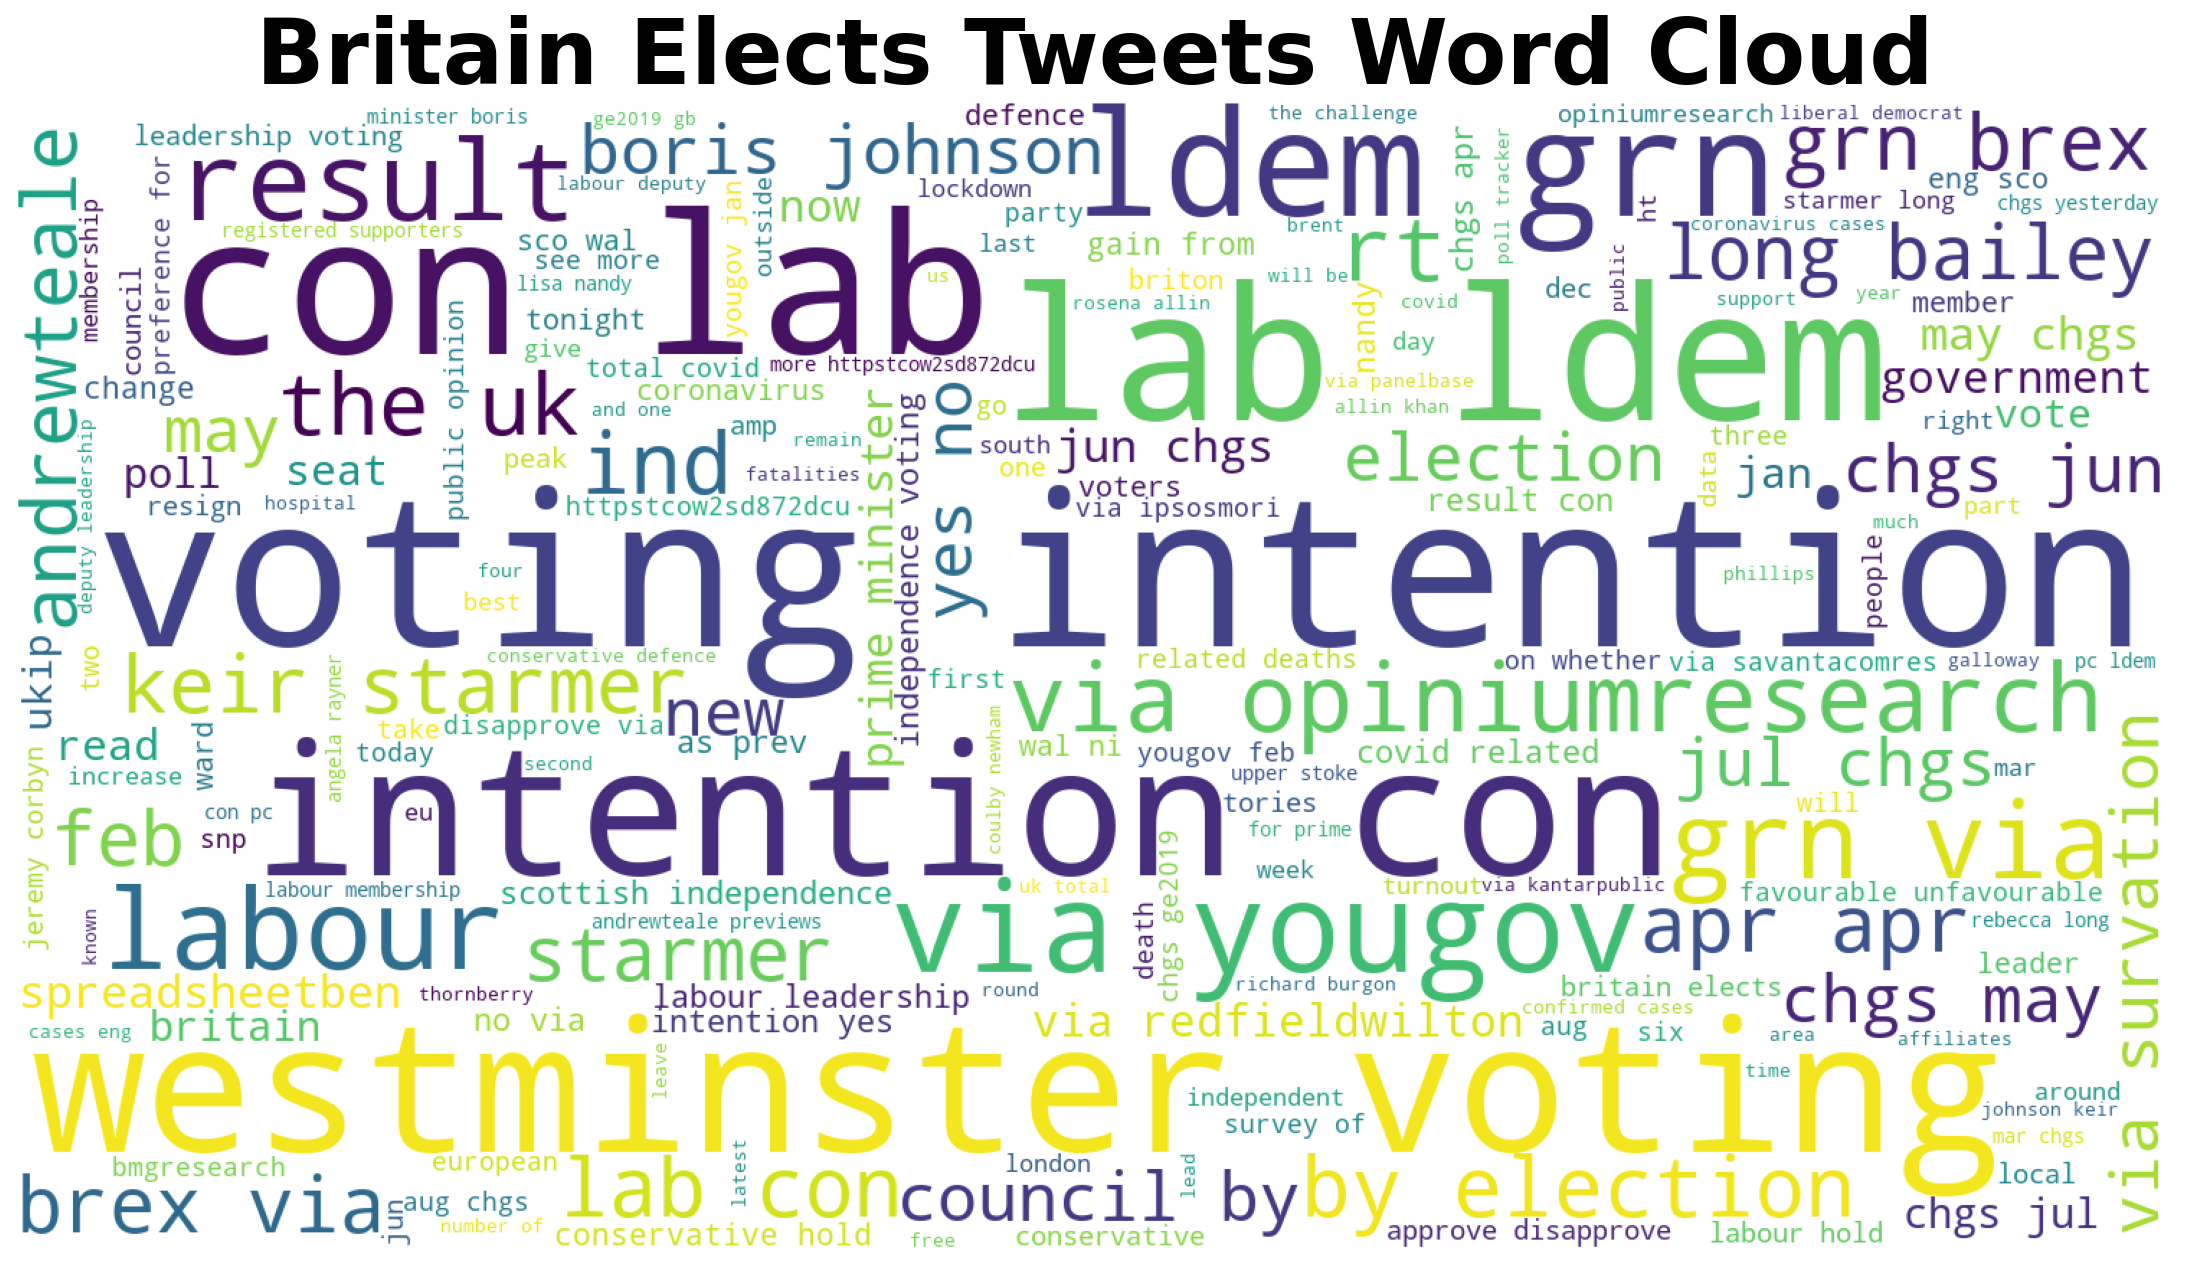

In [4]:
plt.figure(figsize=(15, 8), facecolor=None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.title("Britain Elects Tweets Word Cloud", fontweight="bold", fontsize=45);

In [5]:
df = read_data("britain_elects_wvi_data")
df = process_wvi_data(df)

In [6]:
df.head()

created_at           source      start  \
date                                                                  
2020-01-10 00:00:00 2020-01-13 22:39:06      BMGResearch 2020-01-08   
2020-01-17 00:00:00 2020-01-18 21:40:06  OpiniumResearch 2020-01-15   
2020-01-26 00:00:00 2020-01-28 10:50:20           YouGov 2020-01-24   
2020-01-31 18:07:24 2020-01-31 18:07:24        Survation        NaT   
2020-02-02 00:00:00 2020-02-05 15:10:44           YouGov 2020-01-31   

                           end             change_info  GRN  GRN_change  LAB  \
date                                                                           
2020-01-10 00:00:00 2020-01-10       GE2019, GB result  NaN         NaN   29   
2020-01-17 00:00:00 2020-01-17  GE2019, GB-wide result  4.0         1.0   30   
2020-01-26 00:00:00 2020-01-26       GE2019, GB result  4.0         1.0   29   
2020-01-31 18:07:24        NaT                     NaN  3.0         0.0   33   
2020-02-02 00:00:00 2020-02-02                  26 Jan  5.0         1.0   30   

                     LAB_change  LDEM  LDEM_change  SNP  SNP_change   CON  \
date                                                                        
2020-01-10 00:00:00          -4  11.0         -1.0  NaN         NaN  44.0   
2020-01-17 00:00:00          -3   9.0         -3.0  NaN         NaN  47.0   
2020-01-26 00:00:00          -4  10.0         -2.0  NaN         NaN  49.0   
2020-01-31 18:07:24           1  10.0         -2.0  NaN         NaN   NaN   
2020-02-02 00:00:00           1   8.0         -2.0  NaN         NaN  49.0   

                     CON_change  BREX  BREX_change  UKIP  UKIP_change  \
date                                                                    
2020-01-10 00:00:00        -1.0   NaN          NaN   NaN          NaN   
2020-01-17 00:00:00         2.0   3.0          1.0   NaN          NaN   
2020-01-26 00:00:00         4.0   NaN          NaN   NaN          NaN   
2020-01-31 18:07:24         NaN   3.0          1.0   NaN          NaN   
2020-02-02 00:00:00         0.0   2.0          0.0   NaN          NaN   

                    collection_source  
date                                   
2020-01-10 00:00:00     britainelects  
2020-01-17 00:00:00     britainelects  
2020-01-26 00:00:00     britainelects  
2020-01-31 18:07:24     britainelects  
2020-02-02 00:00:00     britainelects

In [7]:
histo = read_historical_polling_report()
histo.head()

source        end  CON  LAB  LDEM  UKIP  GRN  \
date                                                                
2019-12-11      DeltapollUK 2019-12-11   45   35    10   NaN  3.0   
2019-12-11     KantarPublic 2019-12-11   44   32    13   NaN  3.0   
2019-12-11      BMGResearch 2019-12-11   41   32    14   NaN  3.0   
2019-12-11  OpiniumResearch 2019-12-11   45   33    12   NaN  2.0   
2019-12-11        Panelbase 2019-12-11   43   34    11   NaN  3.0   

           collection_source  
date                          
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh  
2019-12-11            uk_prh

In [8]:
df = pd.concat([histo, df]).sort_index()

In [9]:
plt.style.use("fivethirtyeight")

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb6d98c6d0>)

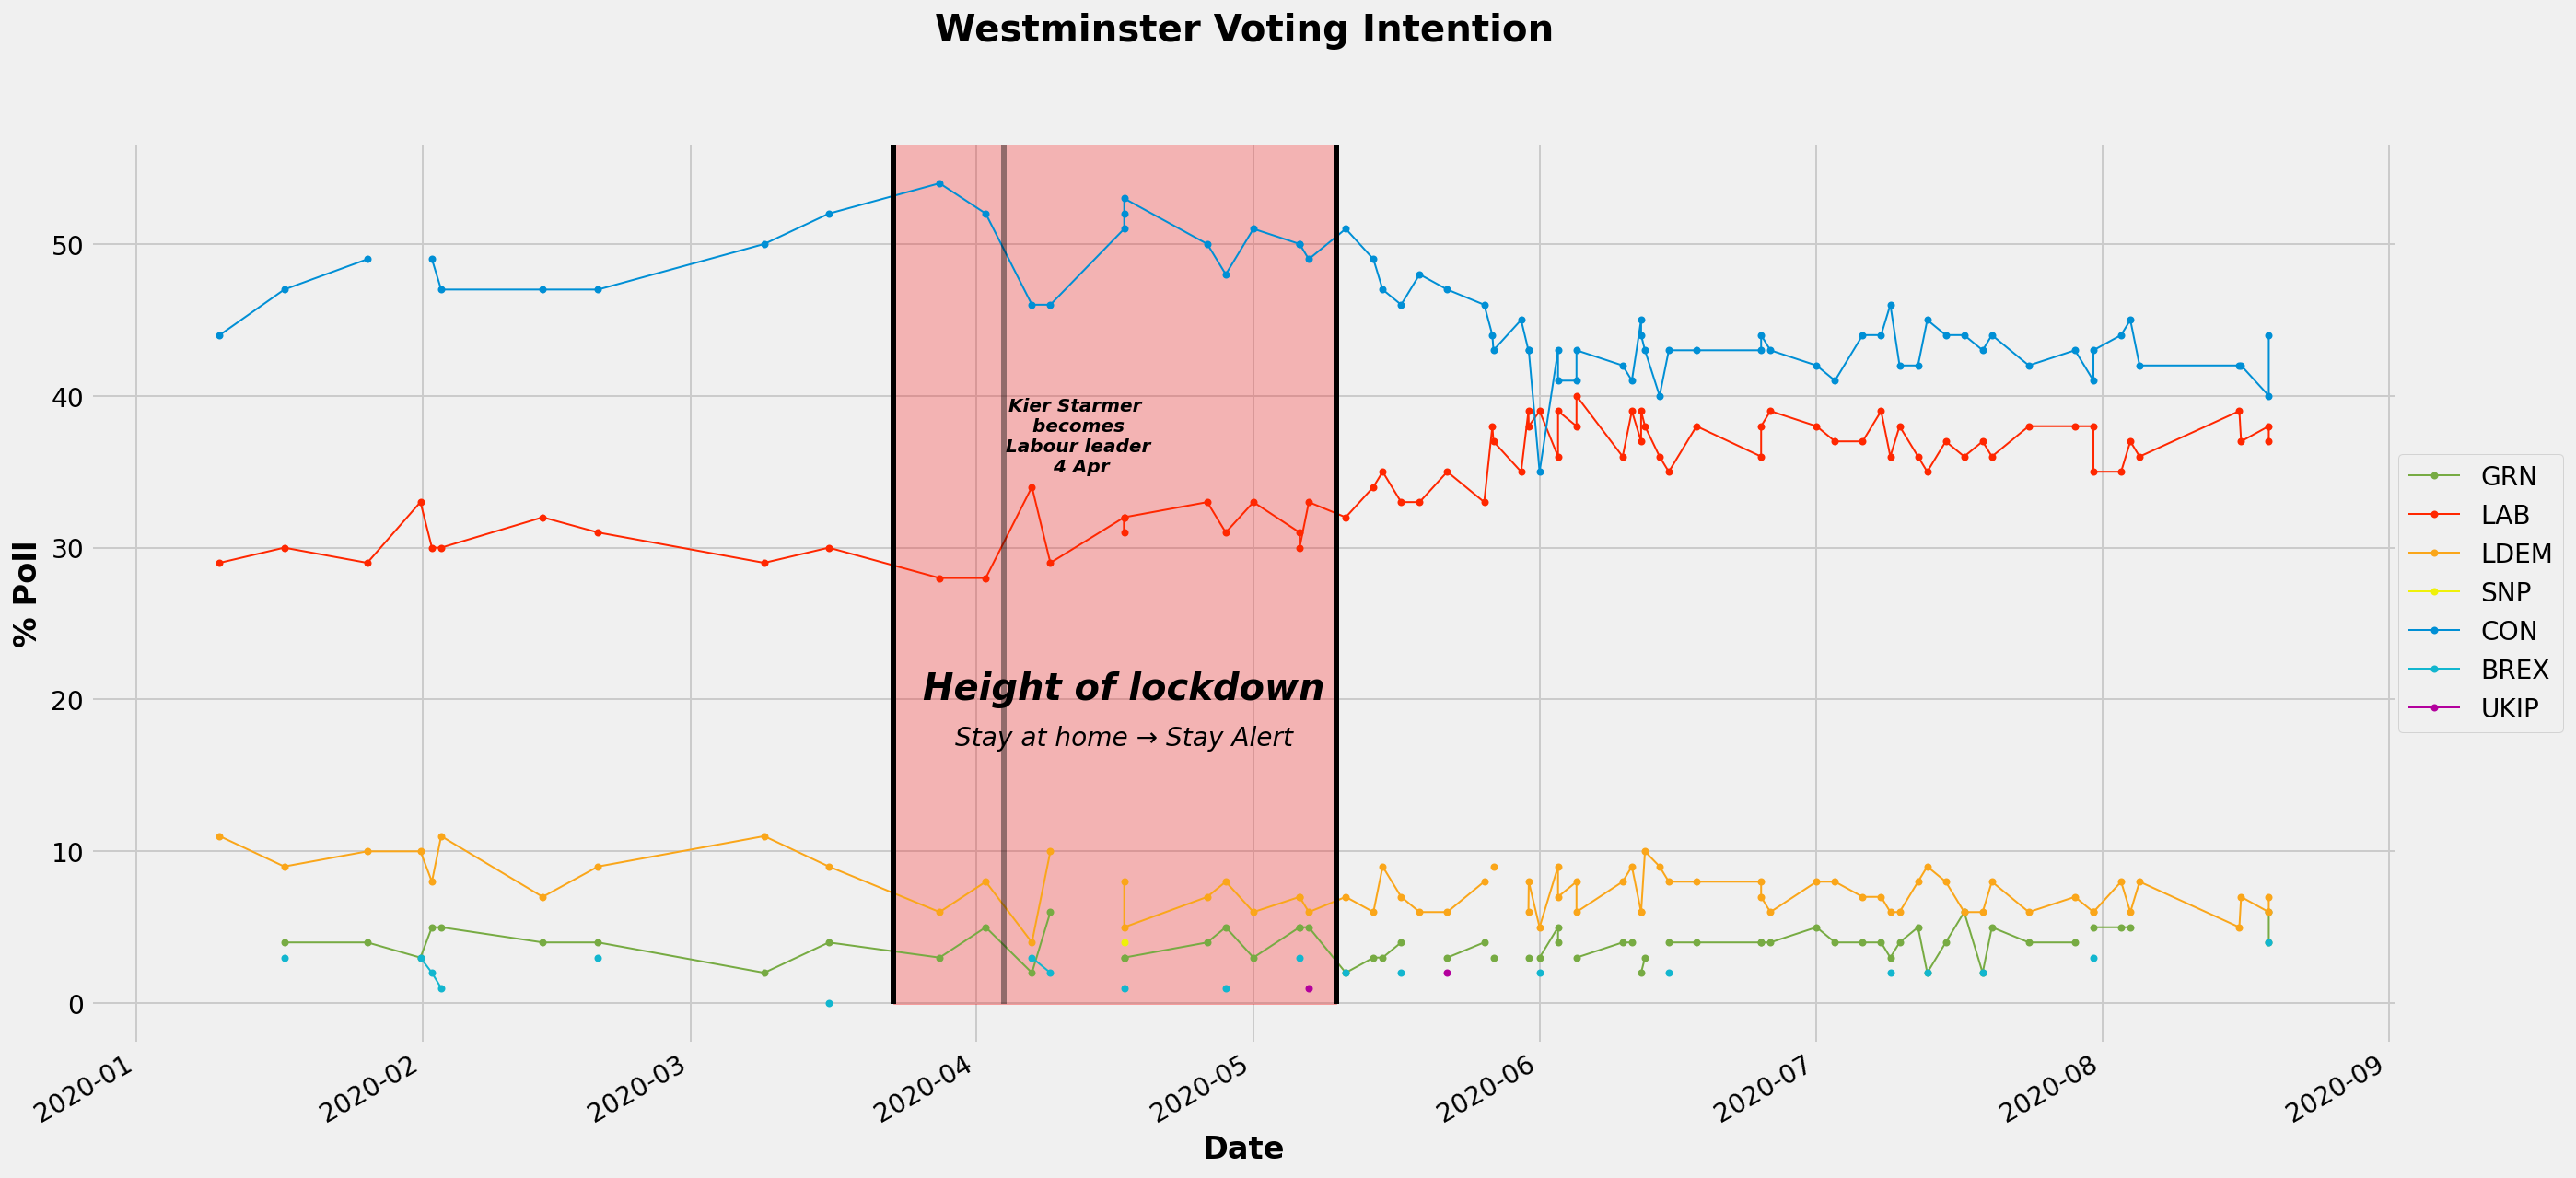

In [10]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], add_lockdown_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb6c1a6a90>)

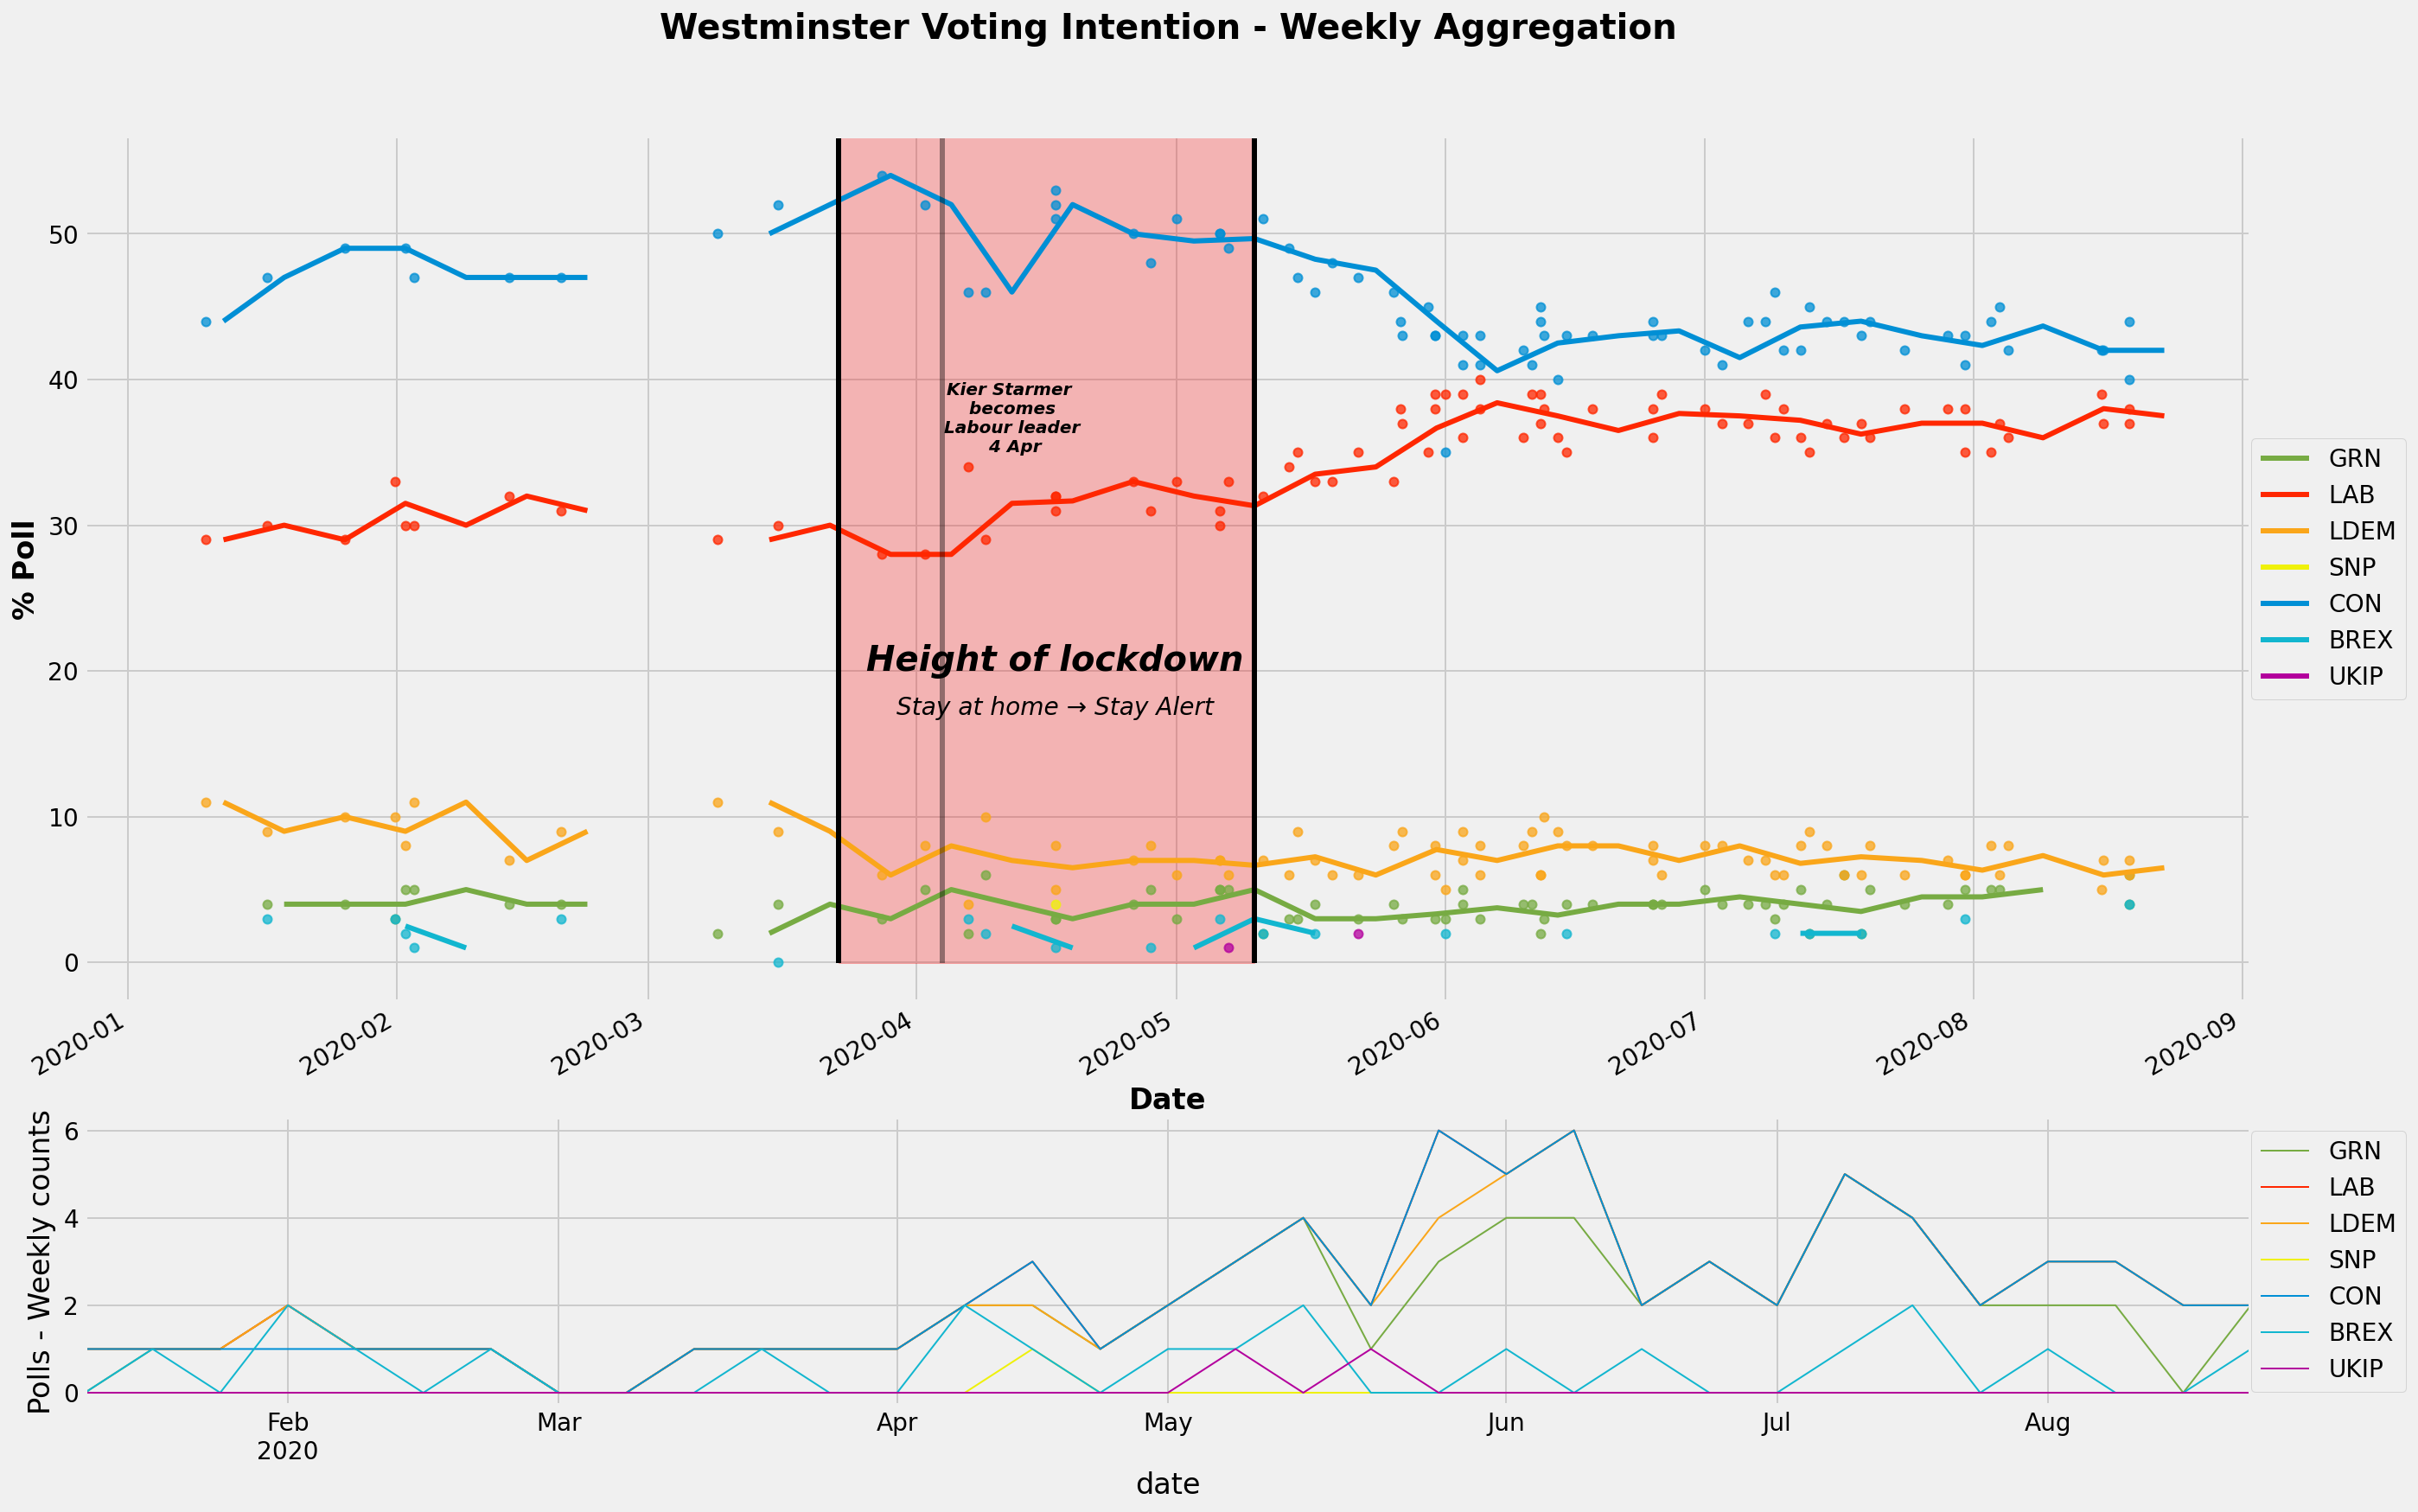

In [11]:
plot_vote_intention(df[df["collection_source"] == "britainelects"], agg="W", add_lockdown_context=True, markersize=5)

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb677dbac0>)

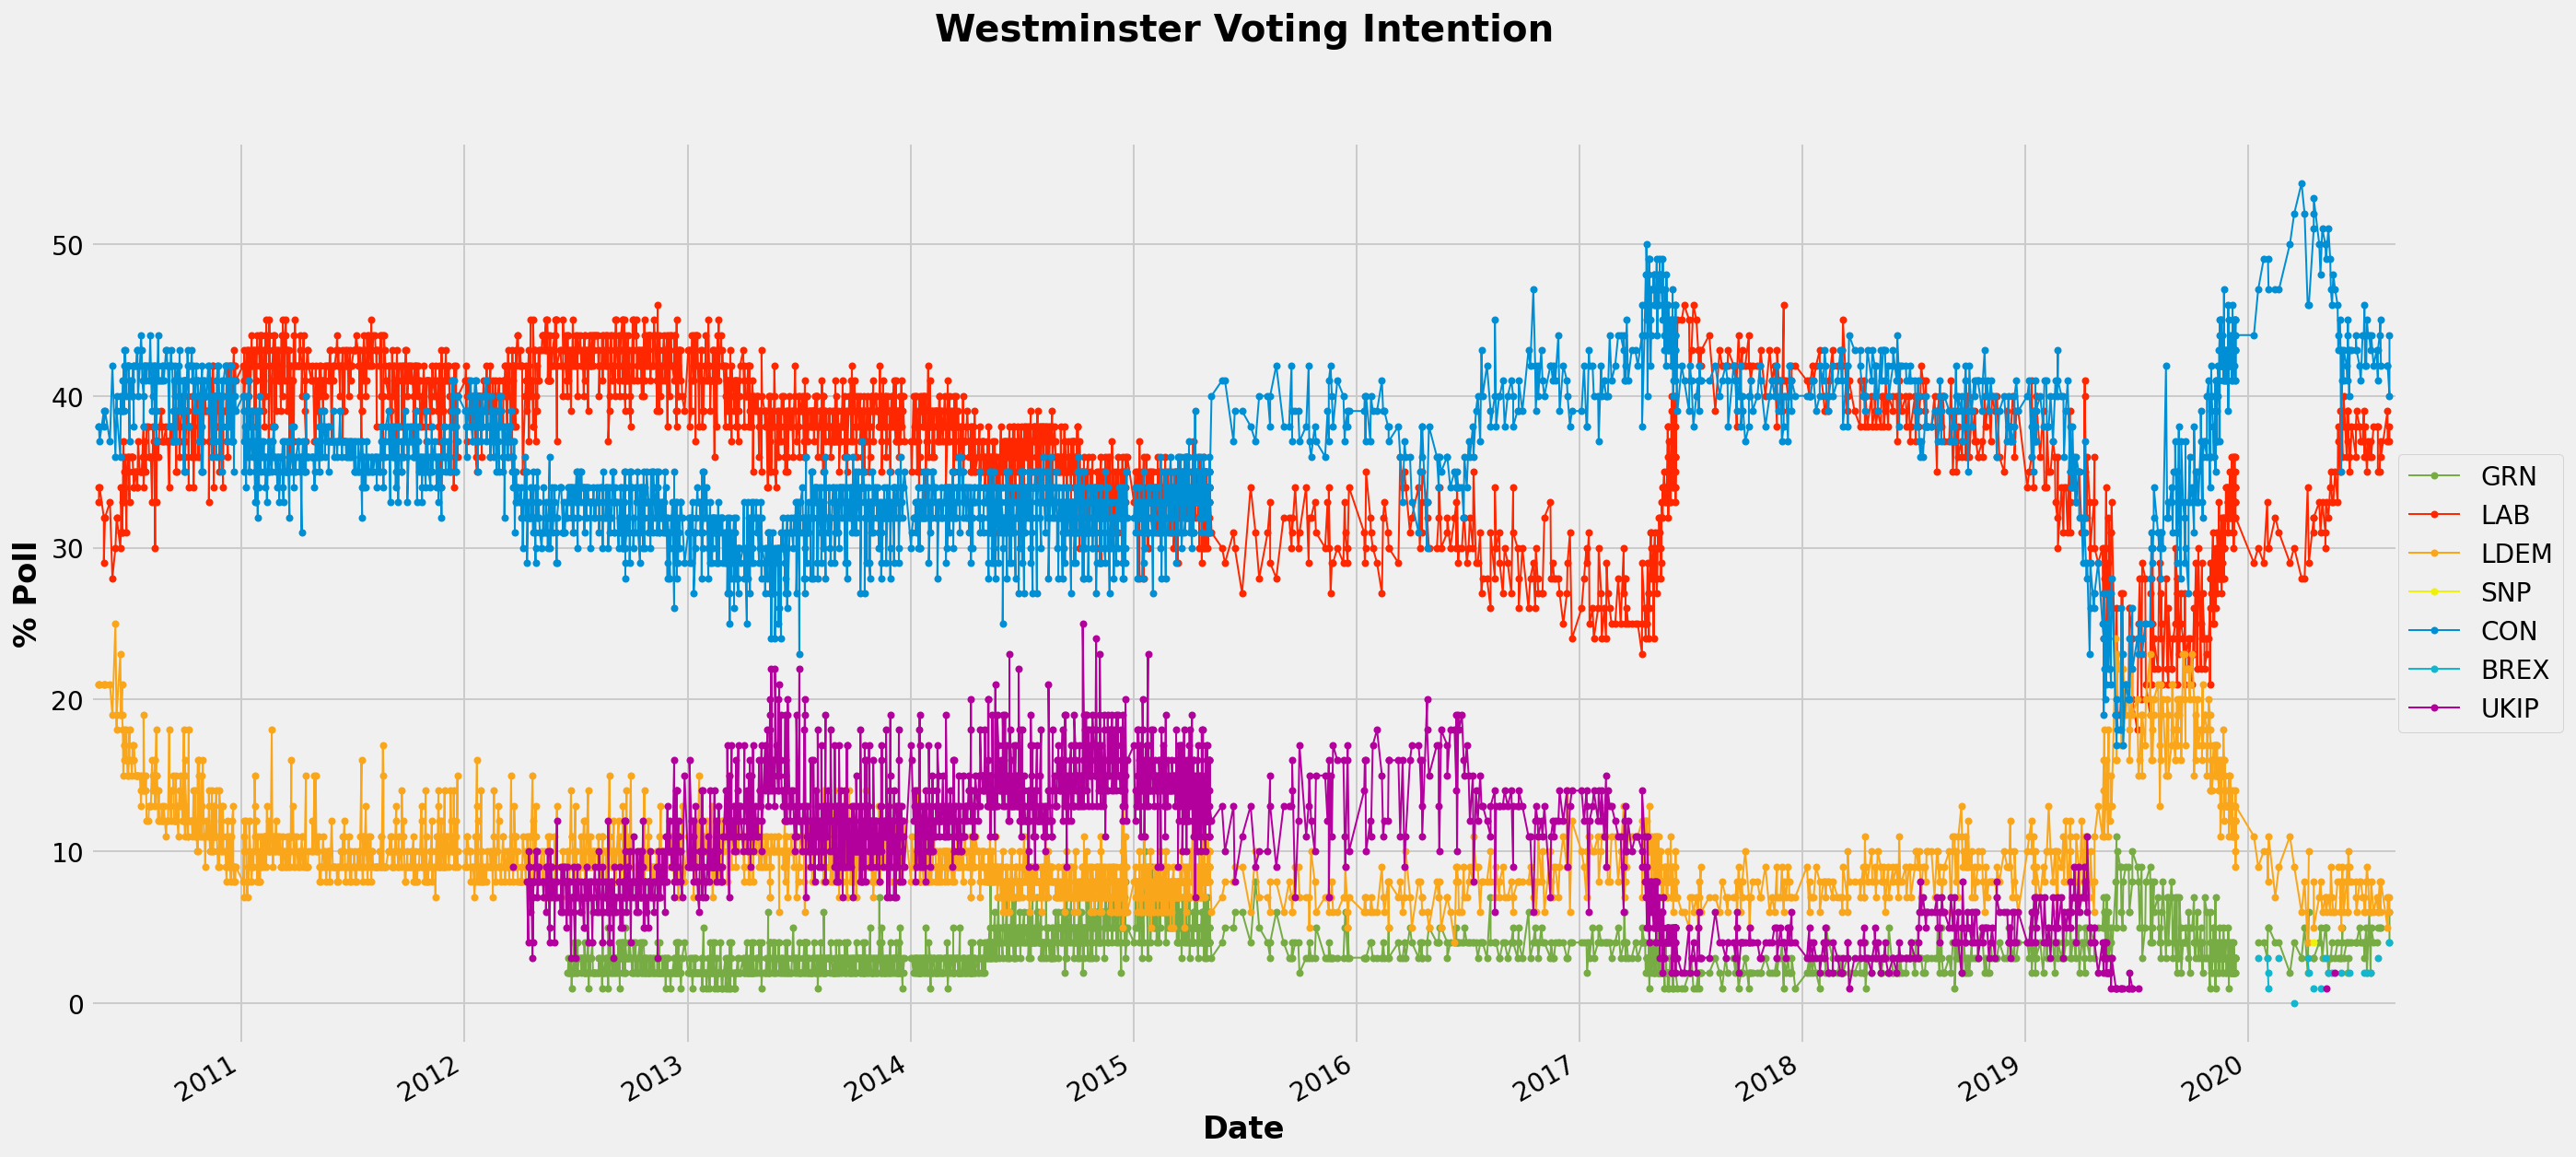

In [12]:
plot_vote_intention(df)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb677b9dc0>)

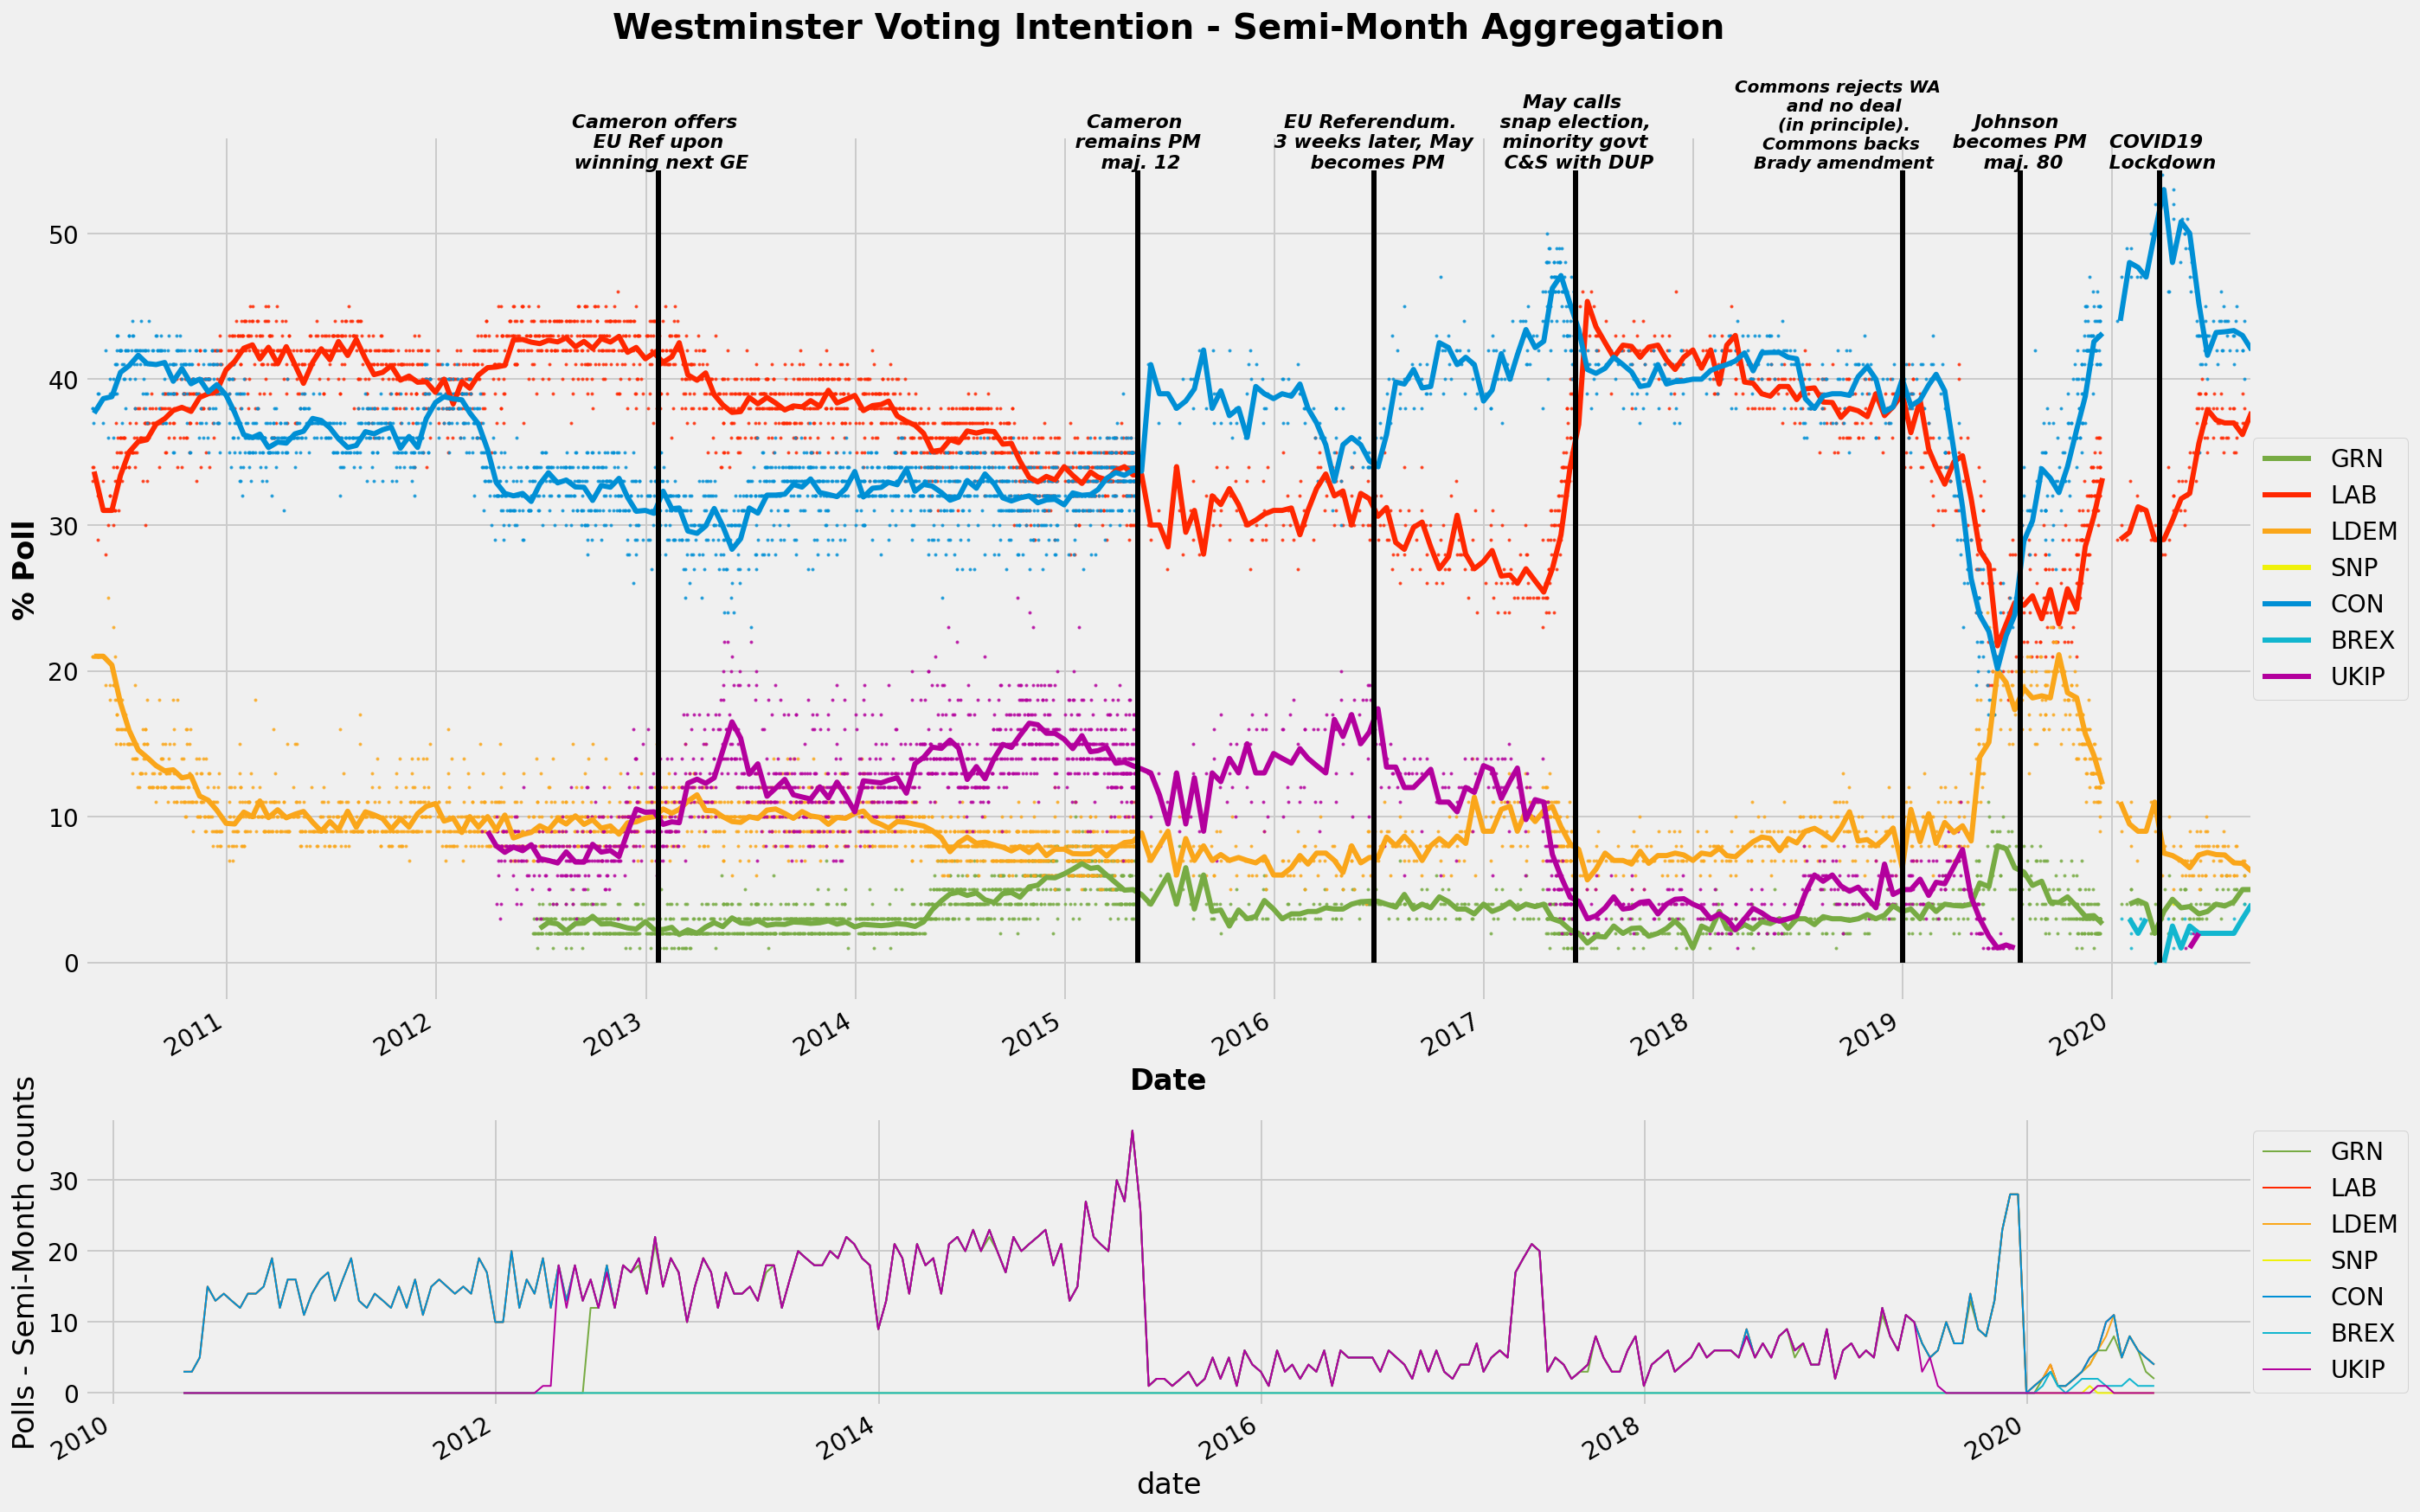

In [13]:
plot_vote_intention(df, agg='SM', add_lifetime_context=True)

(<Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb675842e0>)

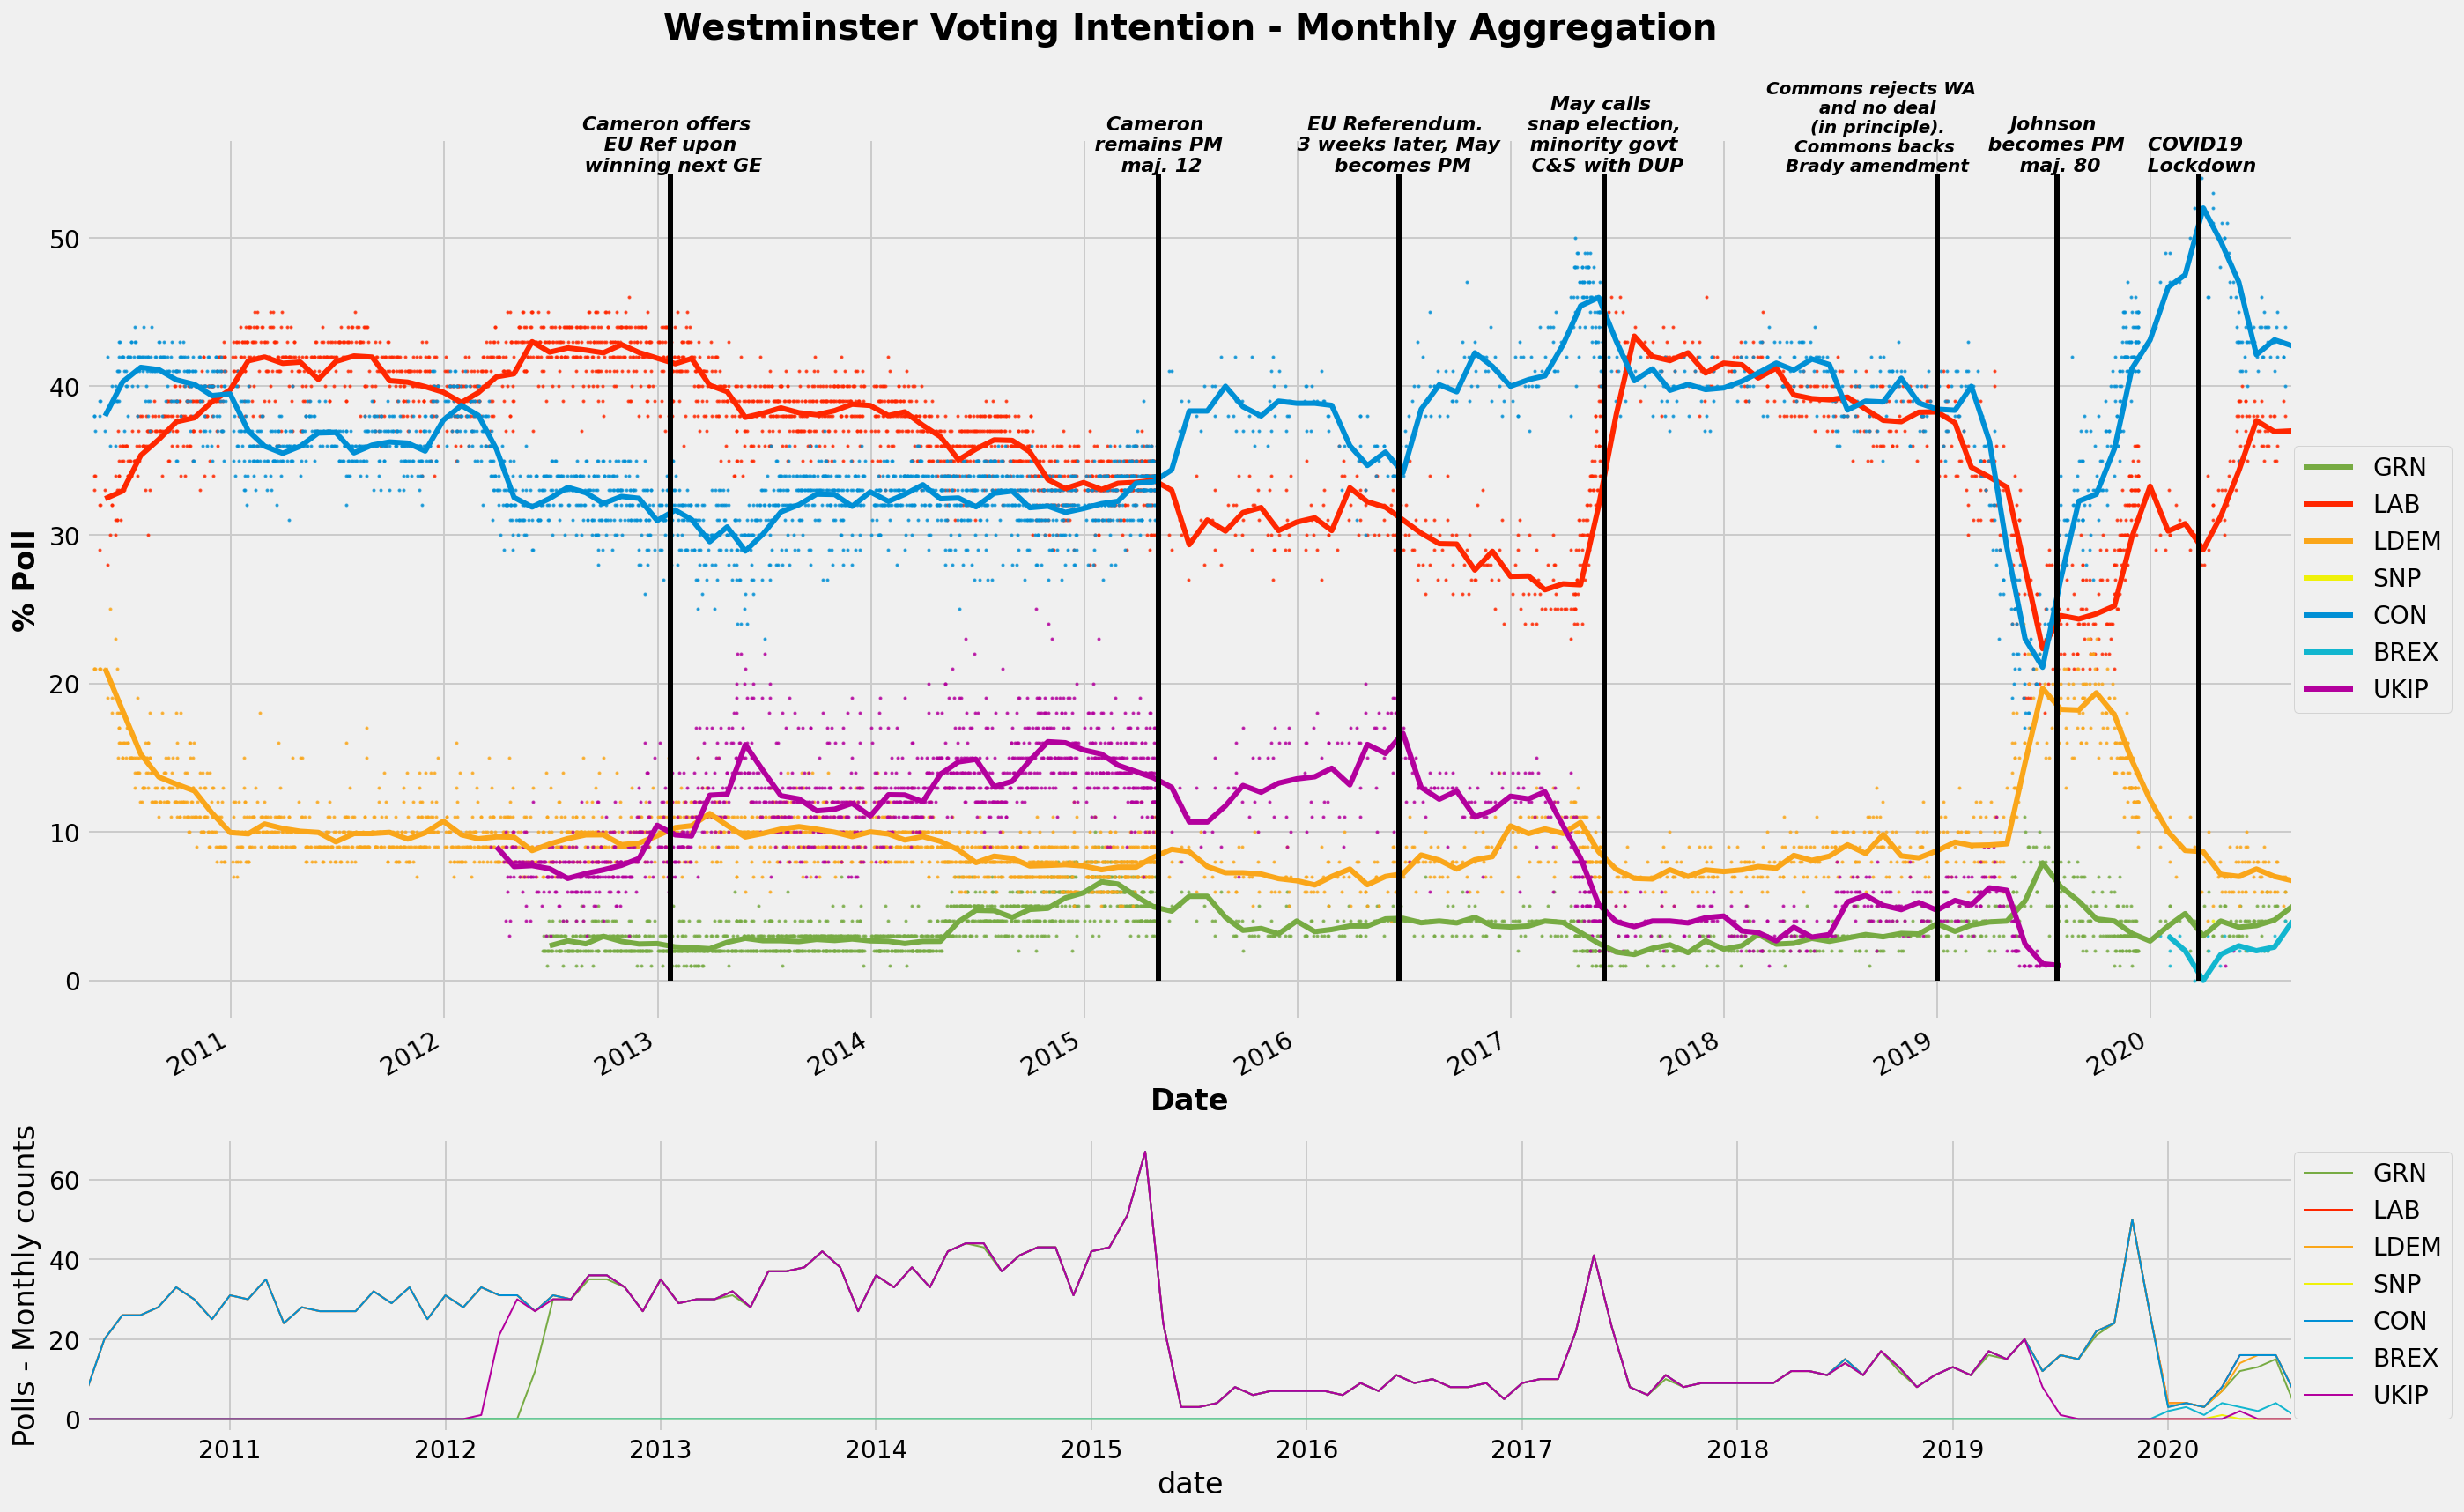

In [14]:
plot_vote_intention(df, agg='M', add_lifetime_context=True)

In [15]:
df[list(parties)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2010-05-13 00:00:00 to 2020-08-19 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRN     2029 non-null   float64
 1   LAB     2764 non-null   int64  
 2   LDEM    2761 non-null   float64
 3   SNP     1 non-null      float64
 4   CON     2763 non-null   float64
 5   BREX    20 non-null     float64
 6   UKIP    1889 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 172.8 KB


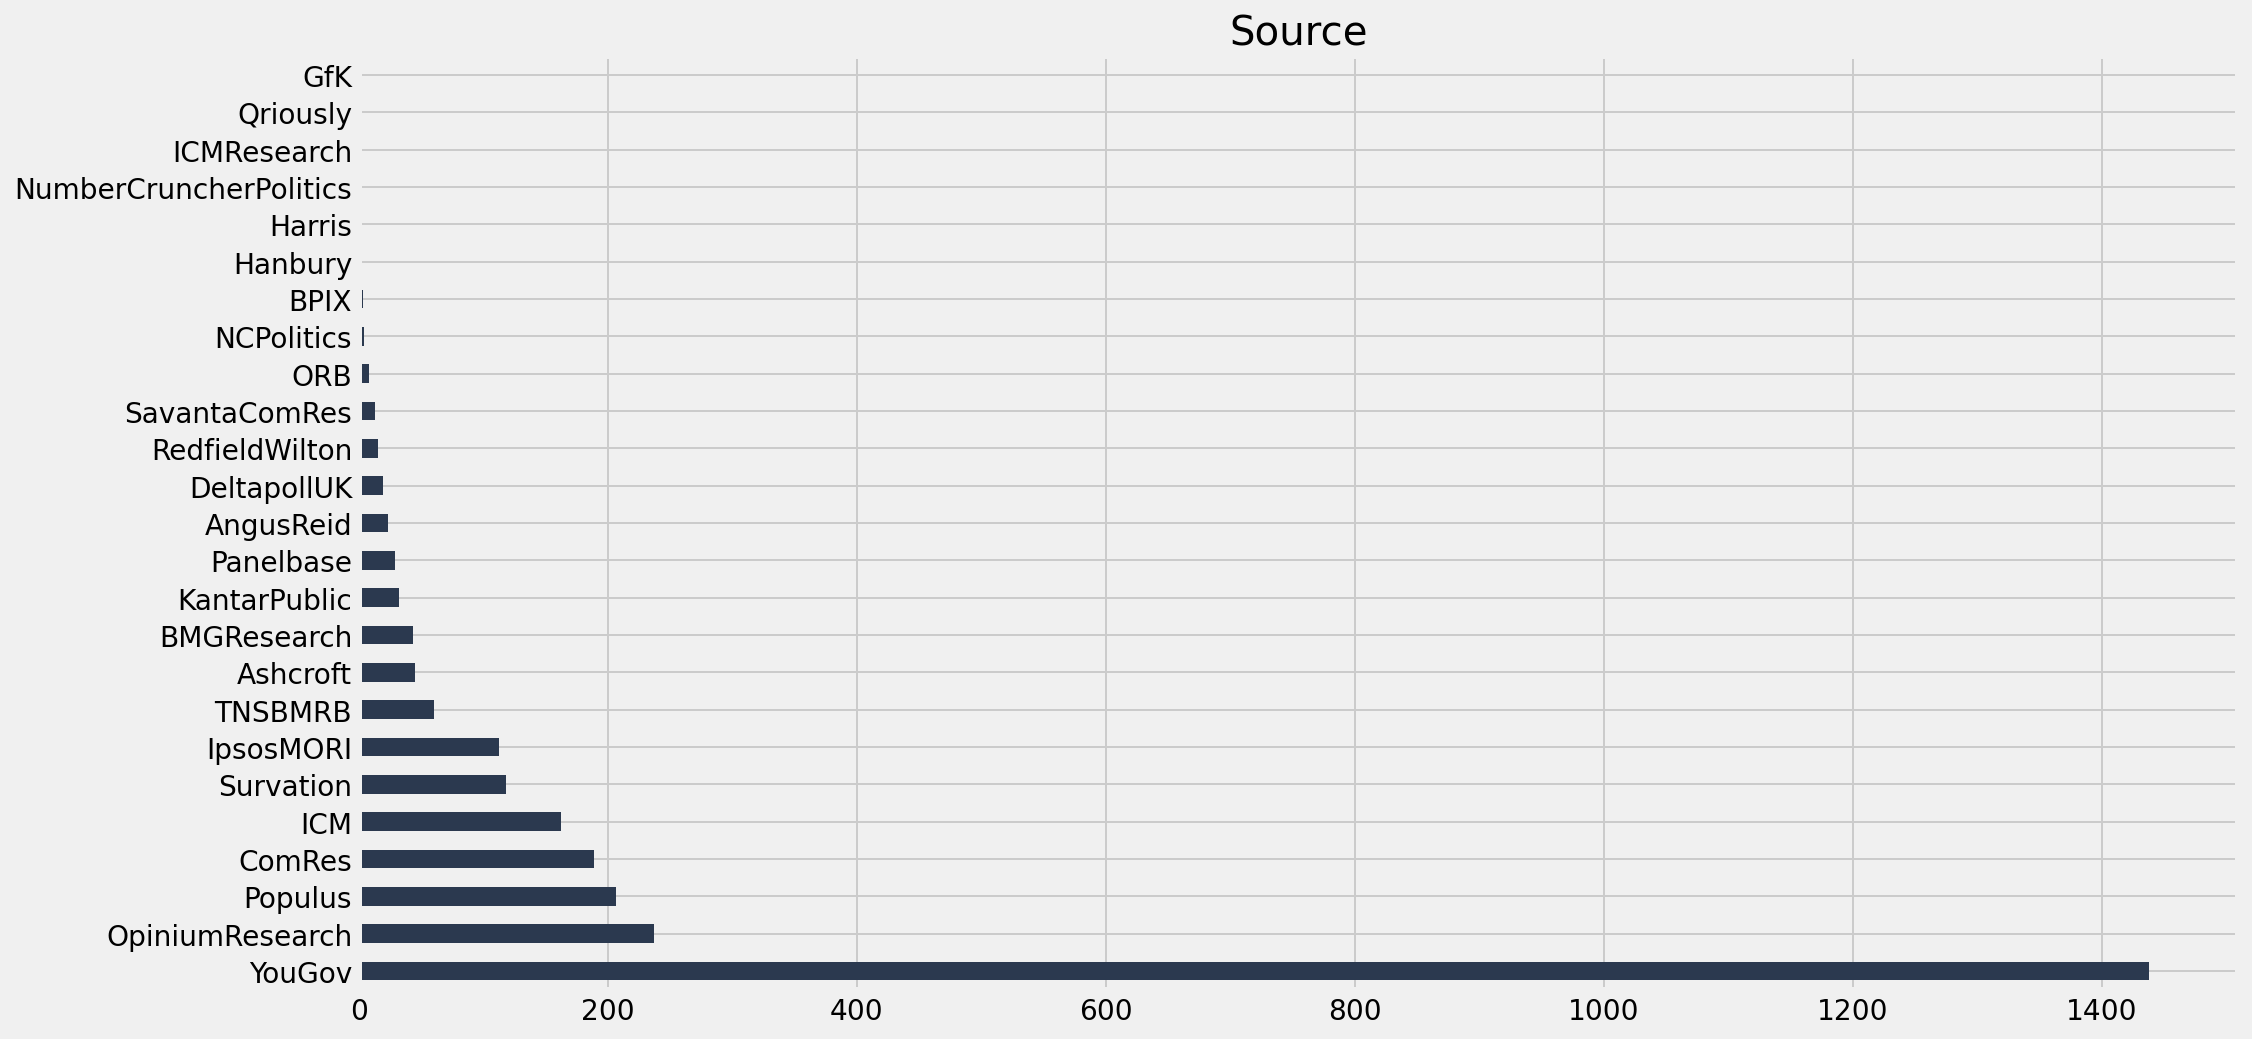

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df["source"].value_counts().plot(kind='barh', ax=ax, color="#2b394f")
ax.set_title("Source");

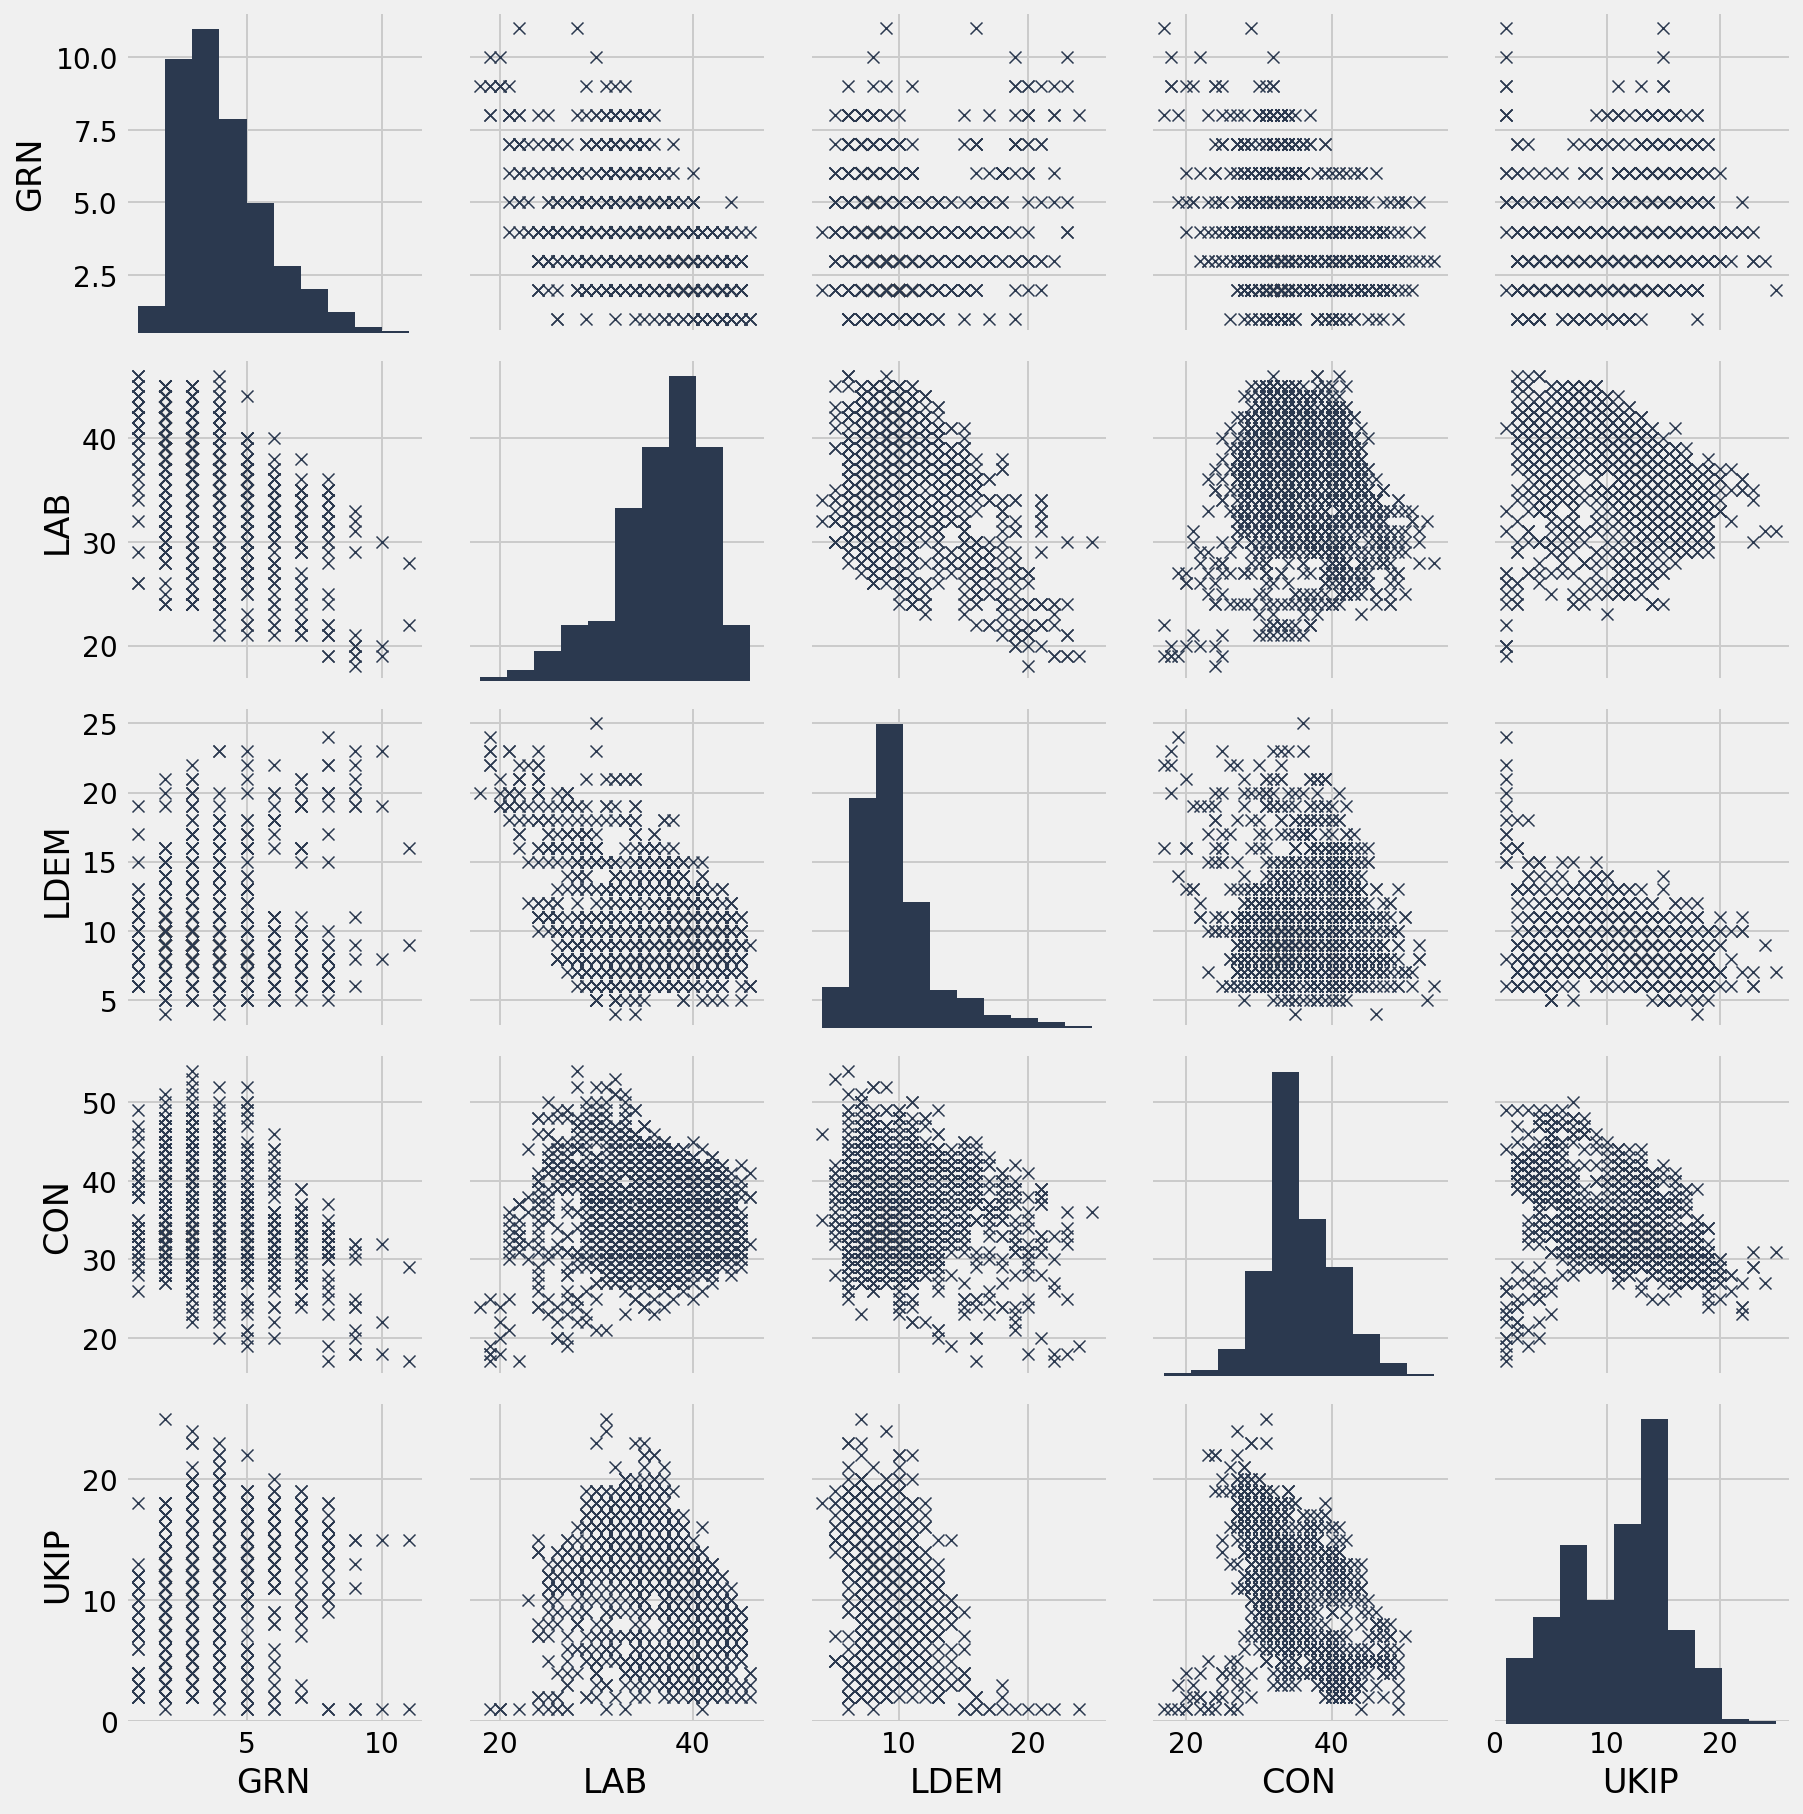

In [17]:
sns.pairplot(df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']], markers="x",
             diag_kws={"color": "#2b394f"},
             plot_kws={"color": "#2b394f"});

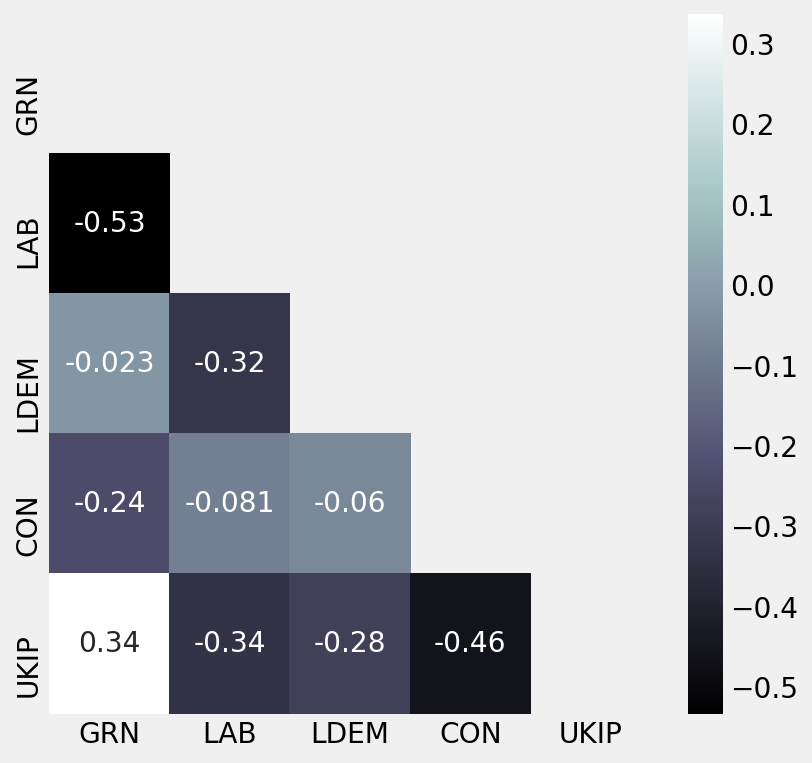

In [18]:
corr = df[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='bone', mask=mask);

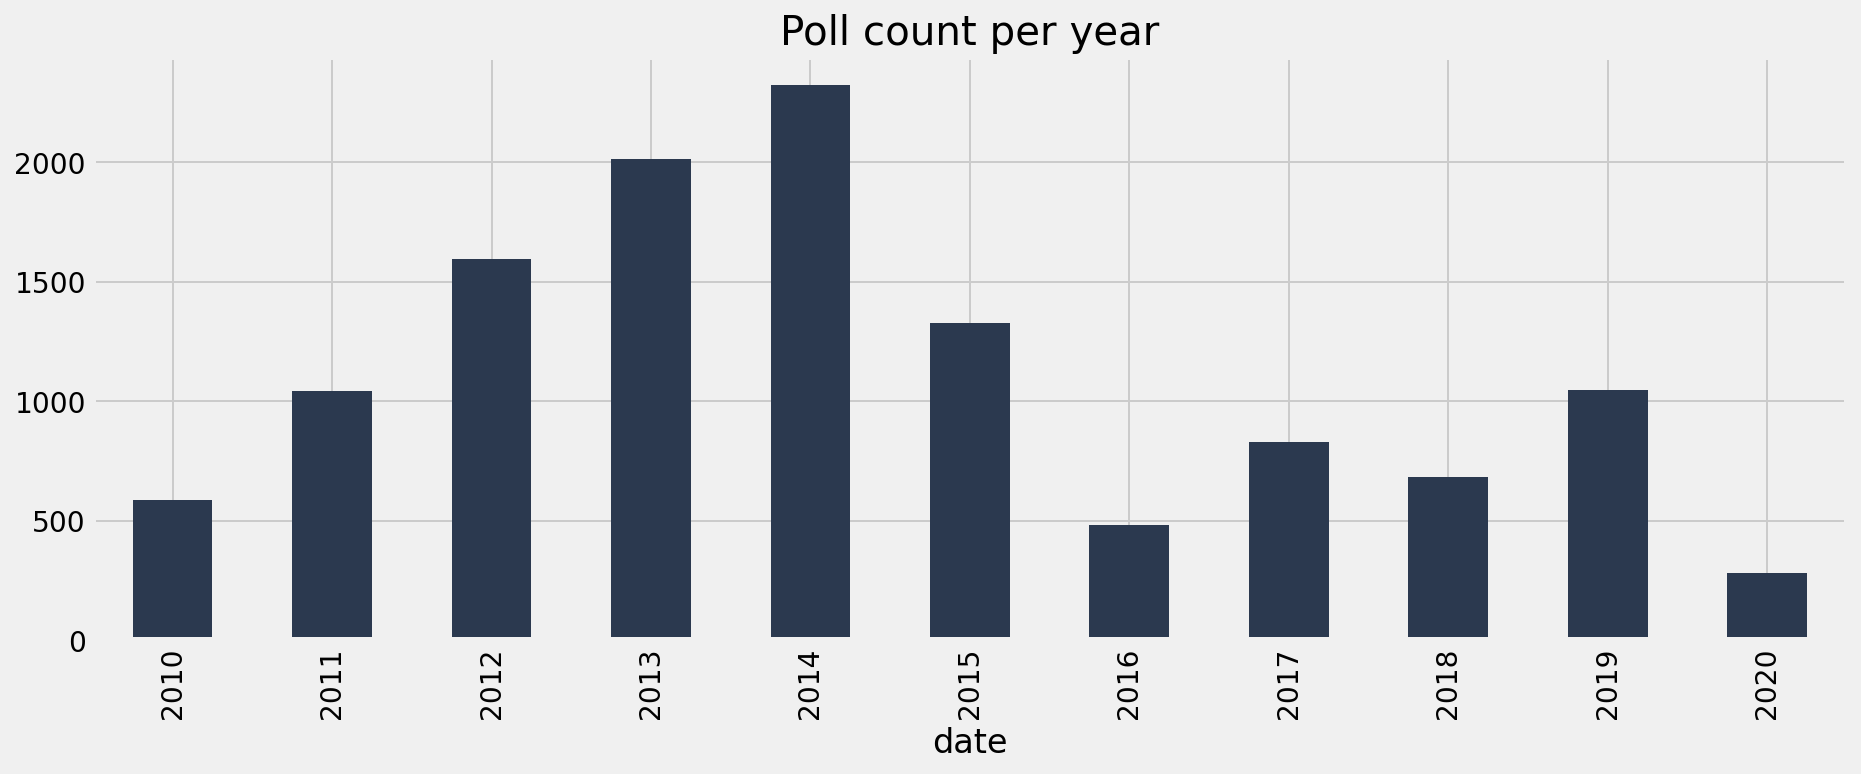

In [19]:
df.groupby(df.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count().sum(axis='columns').plot.bar(figsize=(14, 5), color="#2b394f")
plt.title("Poll count per year");

In [20]:
df_w = df.resample("W").mean()

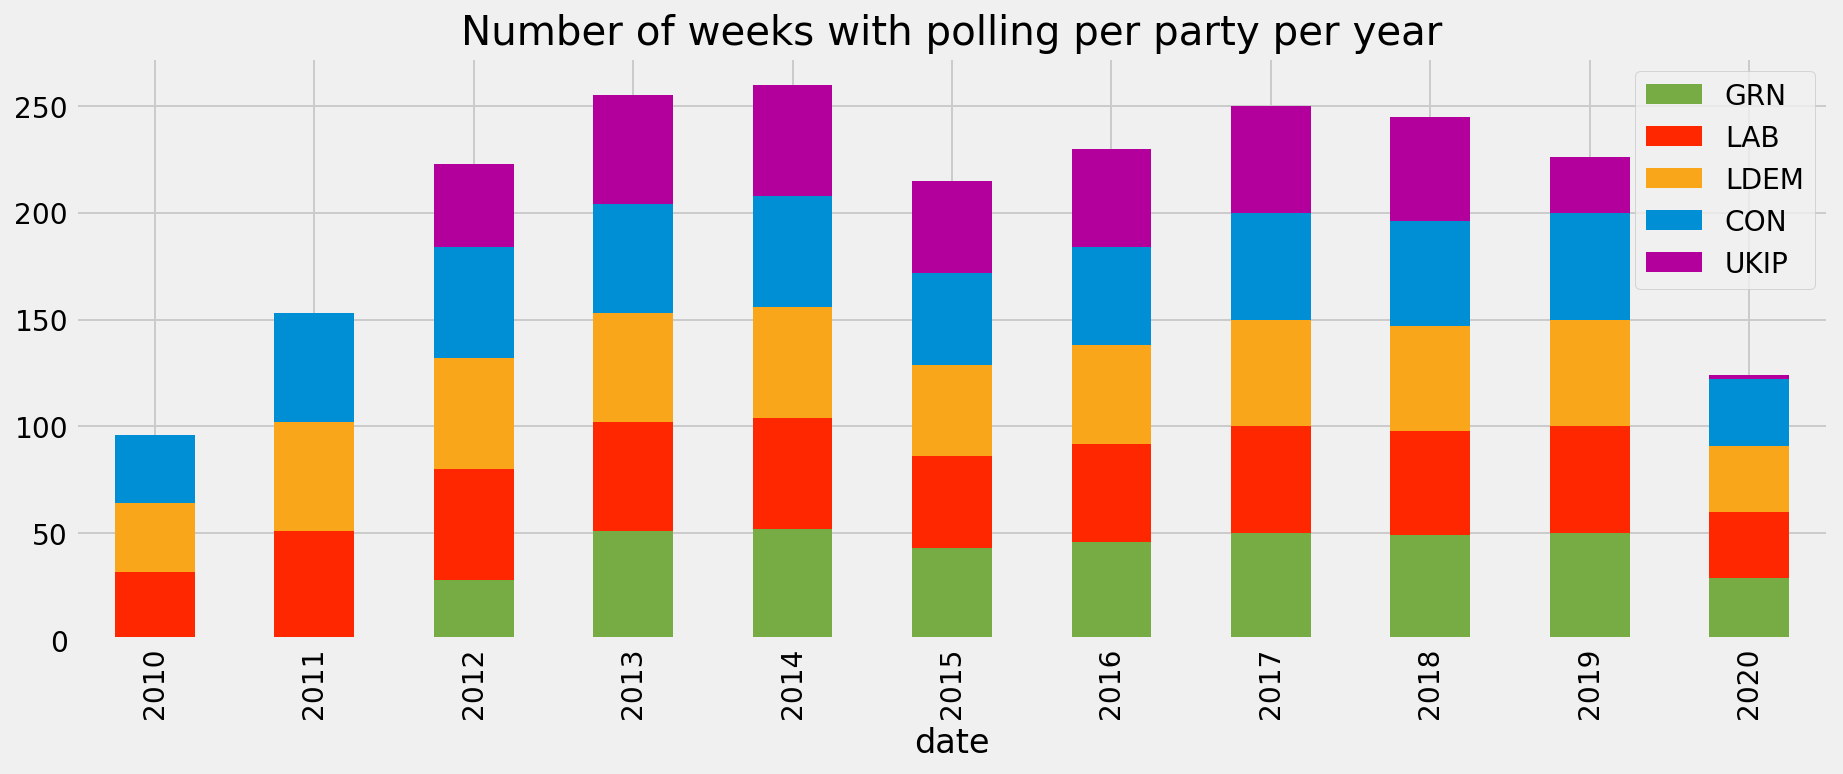

In [21]:
(df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()
 .plot.bar(stacked=True,
           figsize=(14, 5),
           color=["#77AB43", "#FF2700", "#FAA61A", "#008FD5", "#B3009D"]));
plt.title("Number of weeks with polling per party per year");

In [22]:
df_w.groupby(df_w.index.year)[['GRN', 'LAB', 'LDEM', 'CON', 'UKIP']].count()

GRN  LAB  LDEM  CON  UKIP
date                           
2010    0   32    32   32     0
2011    0   51    51   51     0
2012   28   52    52   52    39
2013   51   51    51   51    51
2014   52   52    52   52    52
2015   43   43    43   43    43
2016   46   46    46   46    46
2017   50   50    50   50    50
2018   49   49    49   49    49
2019   50   50    50   50    26
2020   29   31    31   31     2

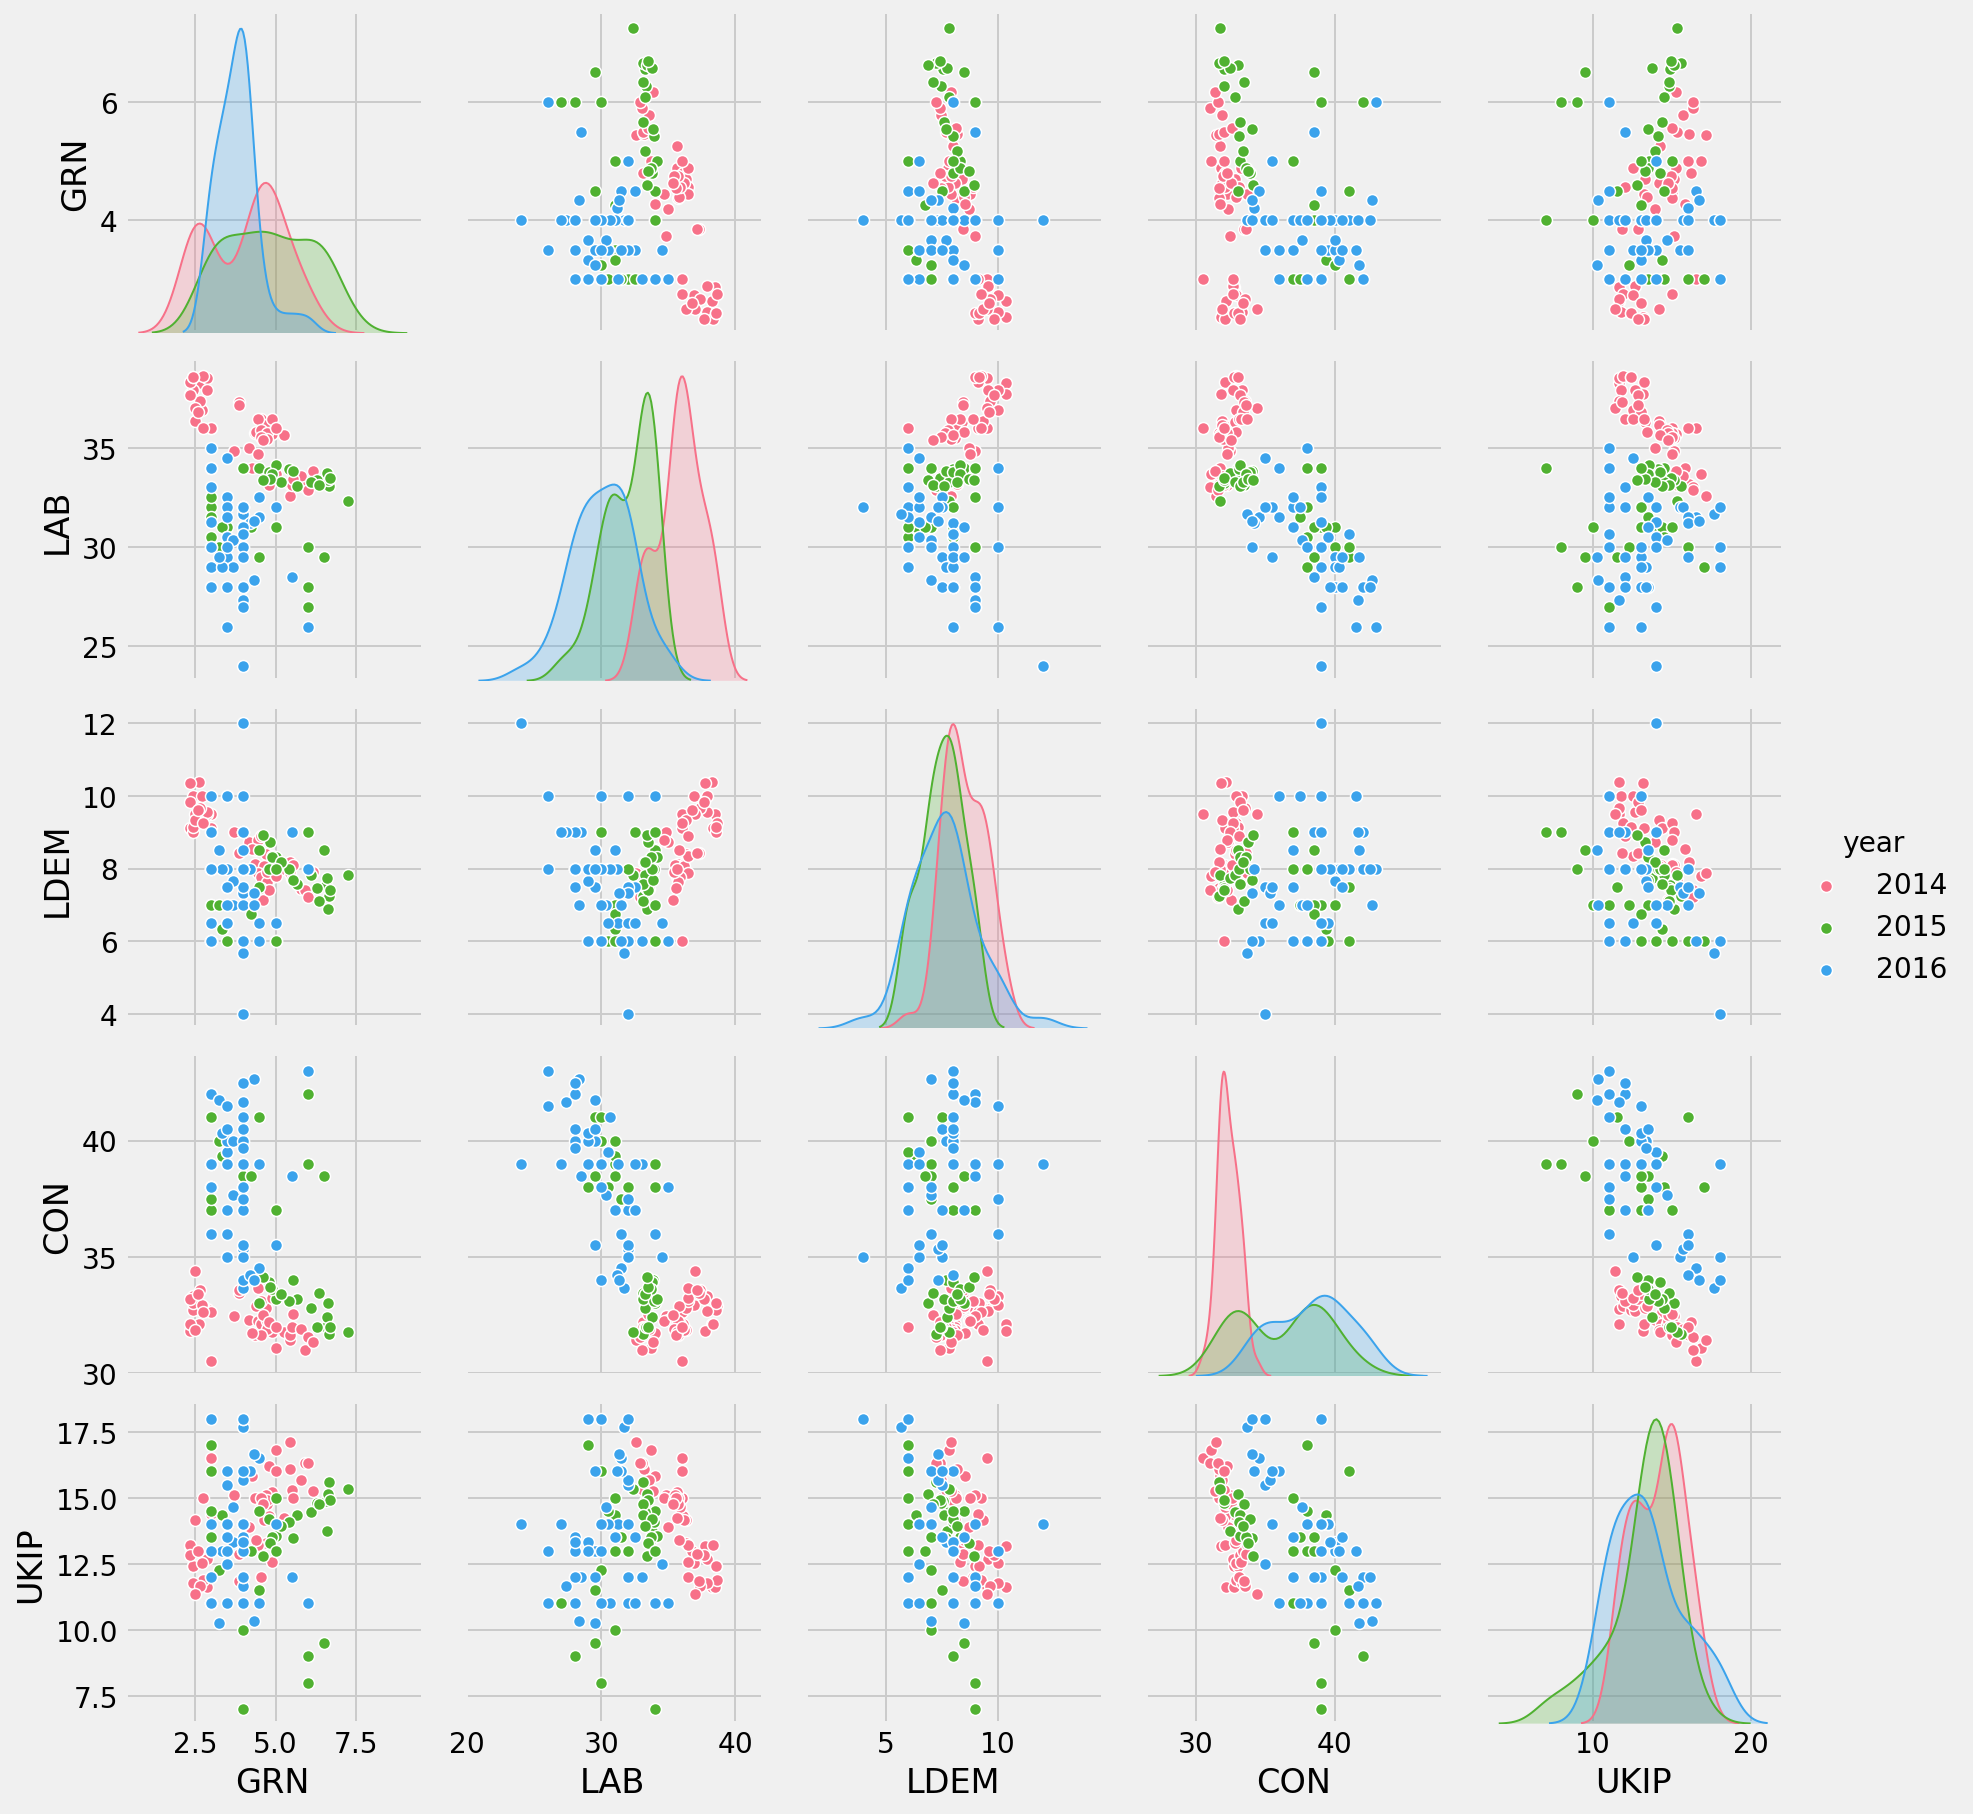

In [23]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2014 <= year <= 2016'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

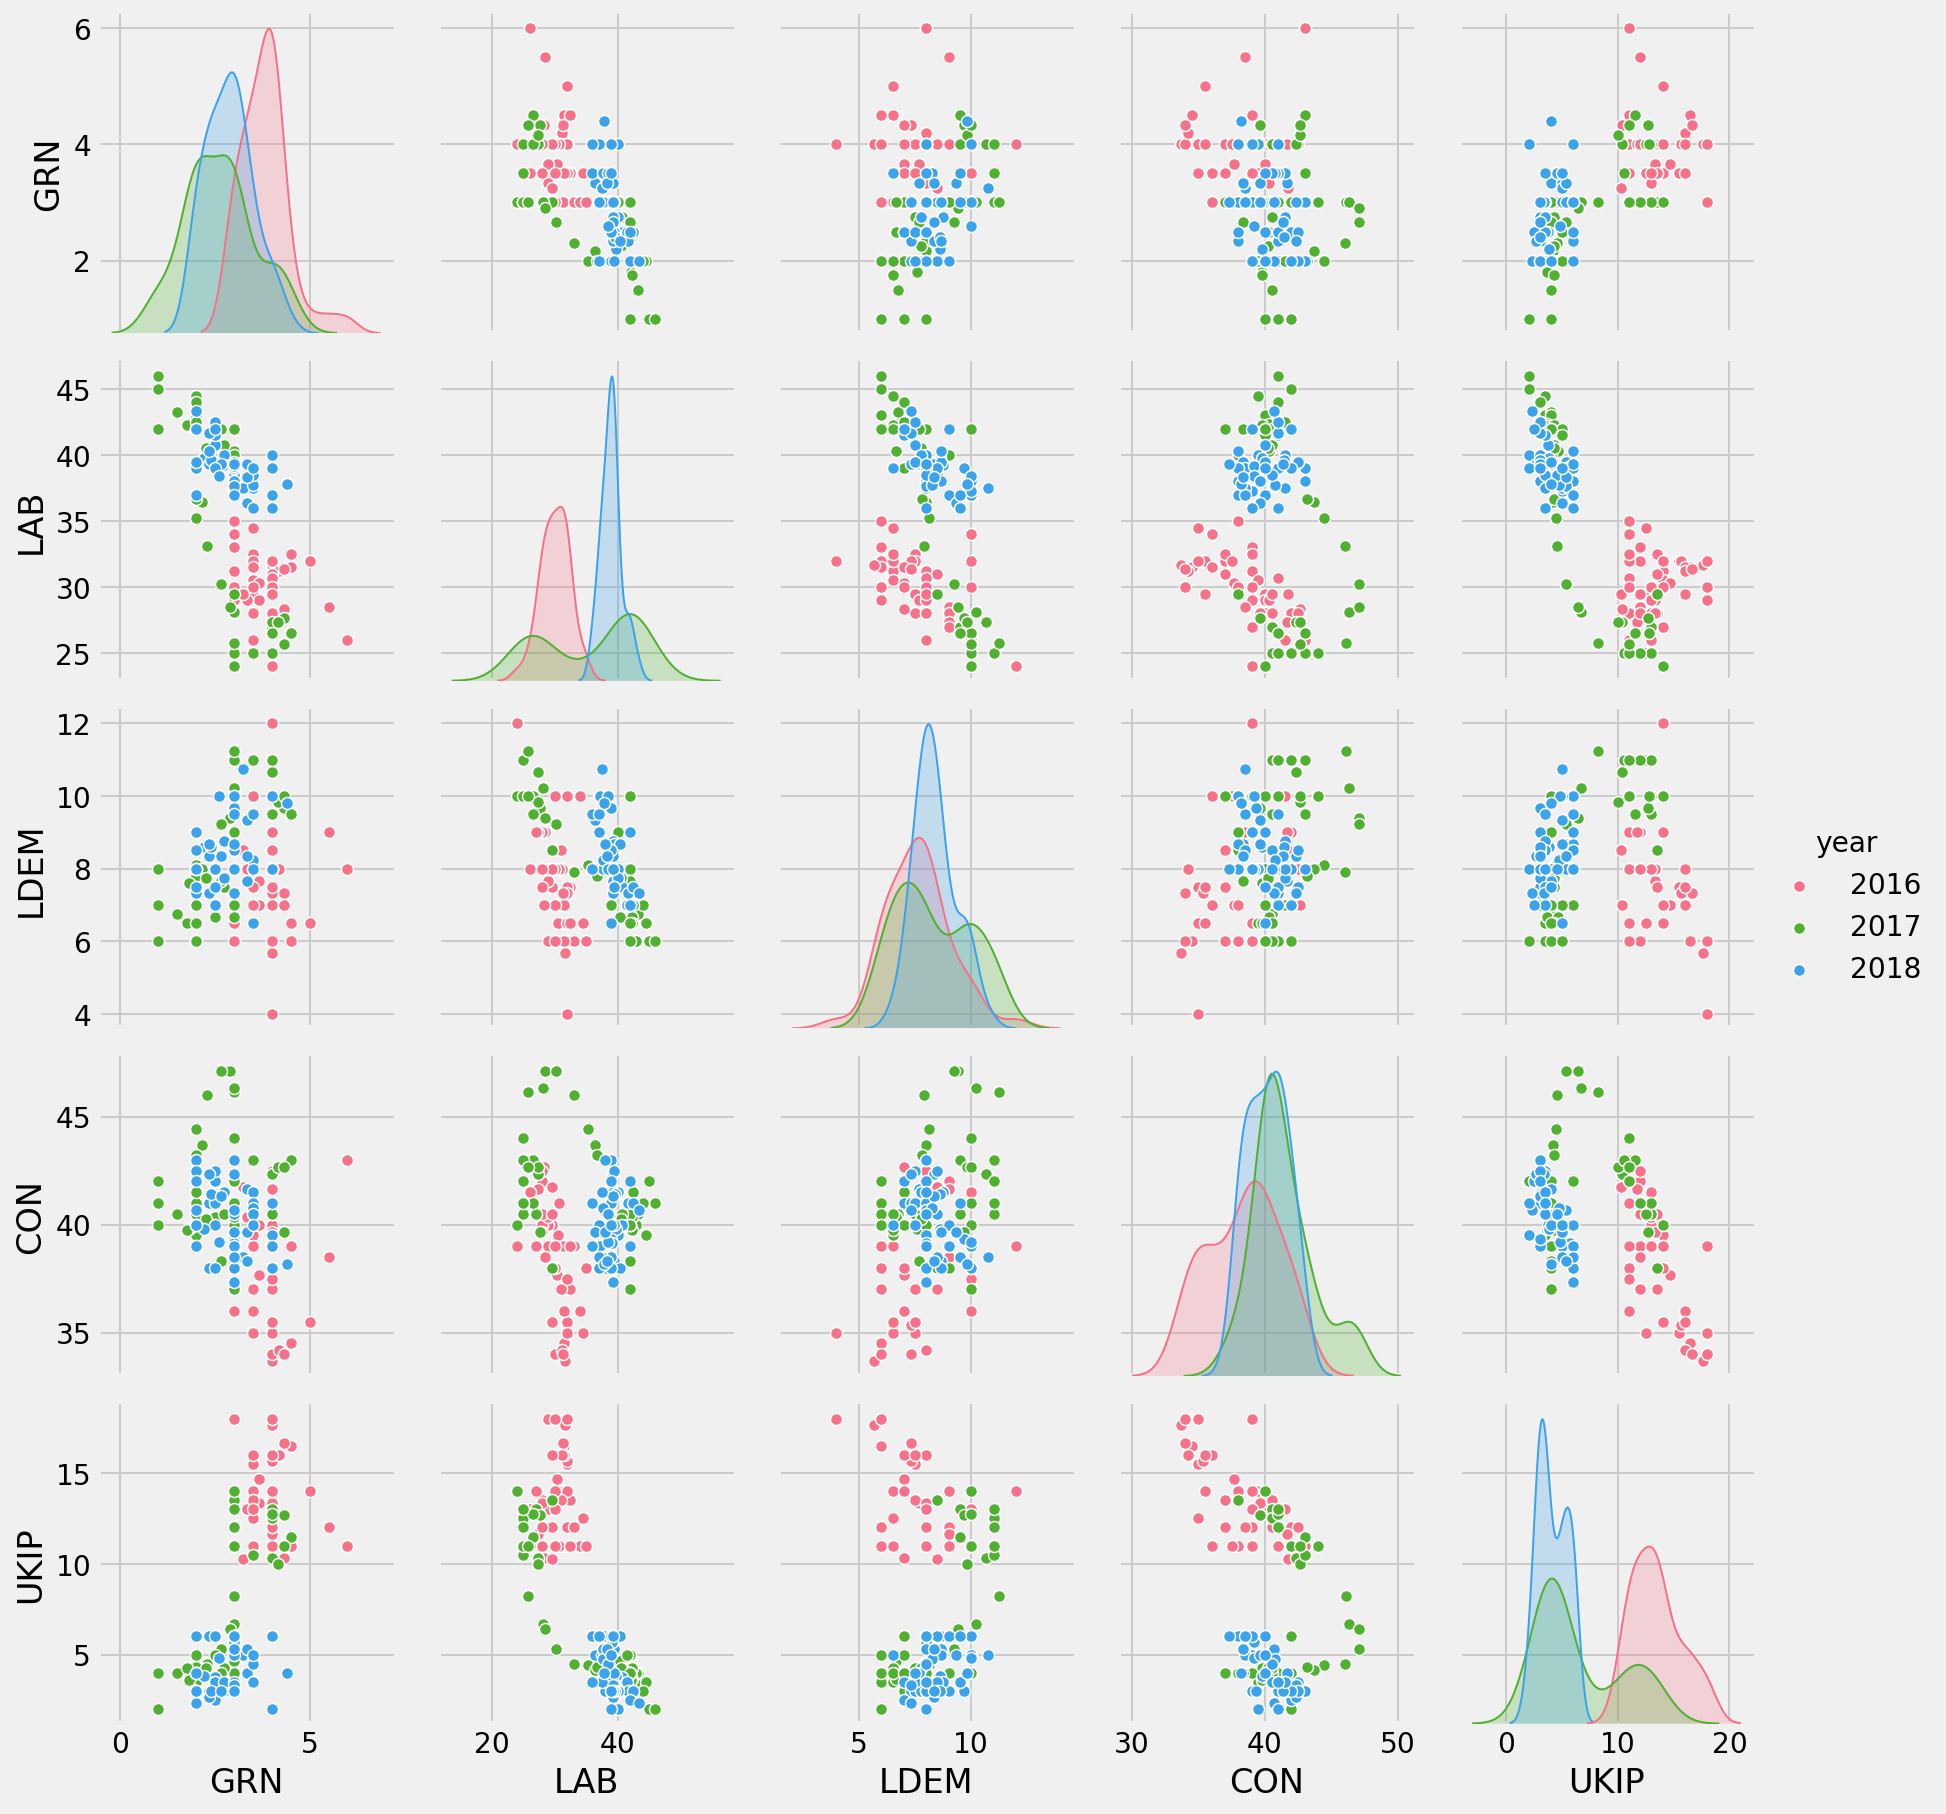

In [24]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2016 <= year <= 2018'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

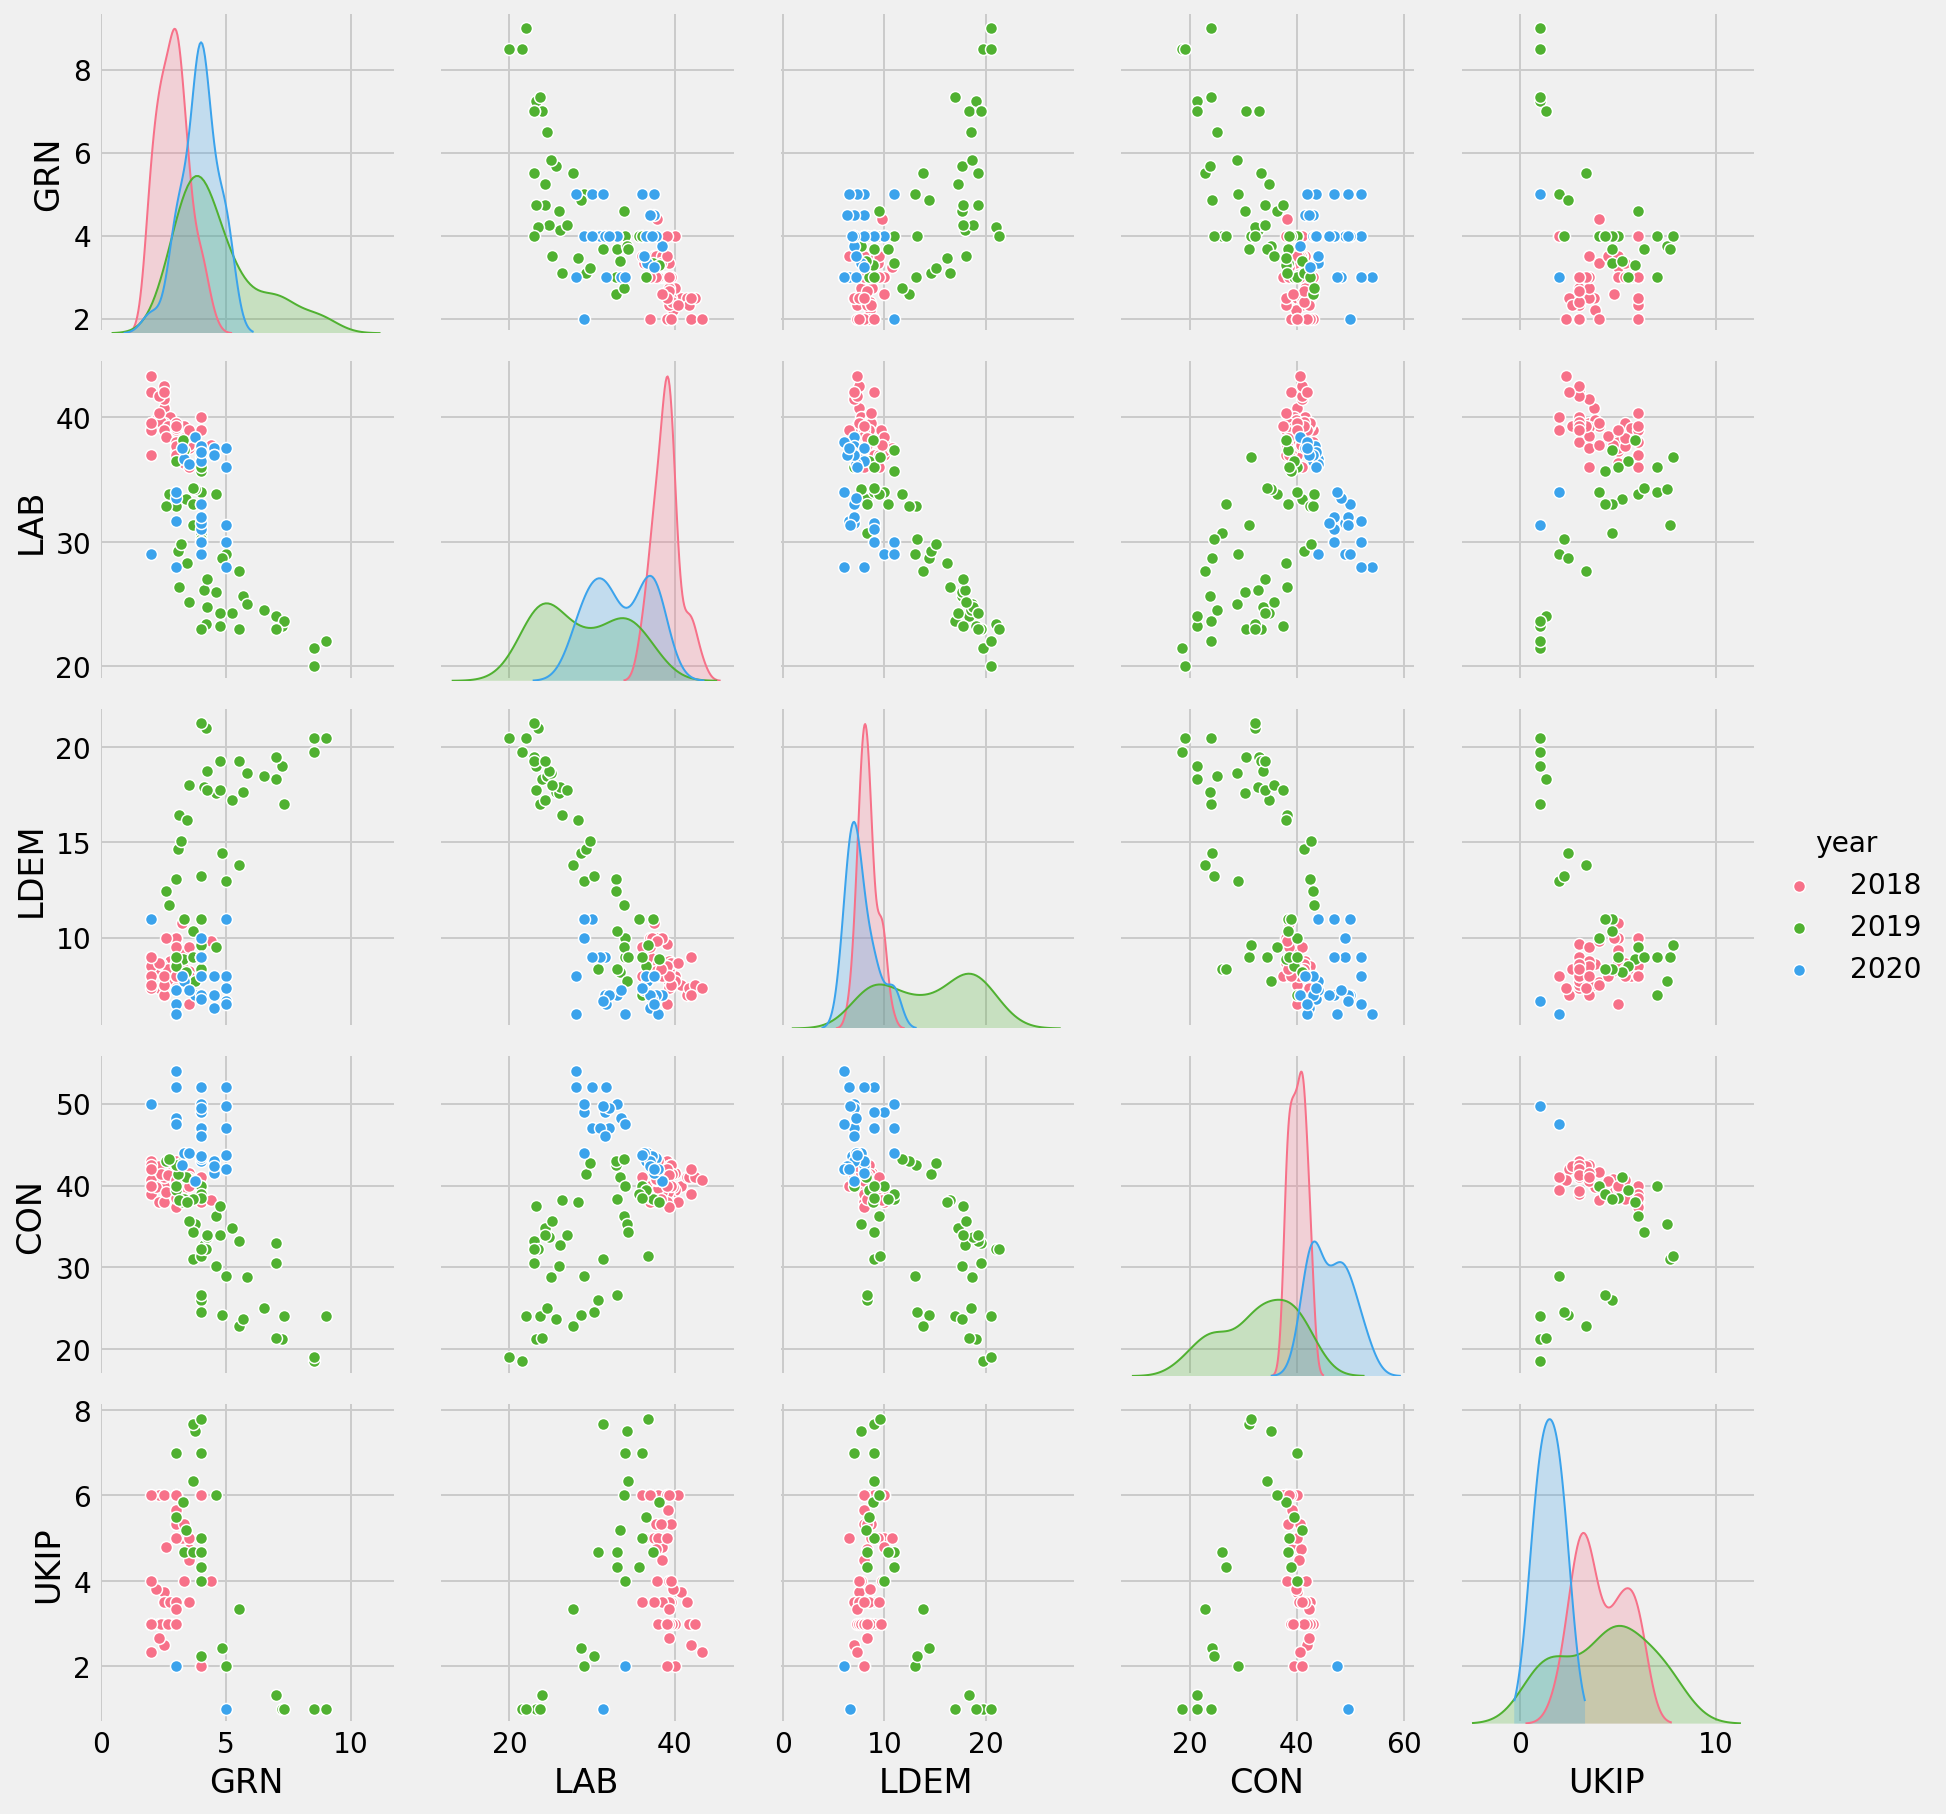

In [25]:
sns.pairplot(df_w.assign(year=df_w.index.year).query('2018 <= year <= 2020'),
             hue='year', palette="husl", vars=['GRN', 'LAB', 'LDEM', 'CON', 'UKIP'],
             diag_kws={"linewidth": 1})

/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/ubuntu/anaconda3/envs/email-service/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (wh

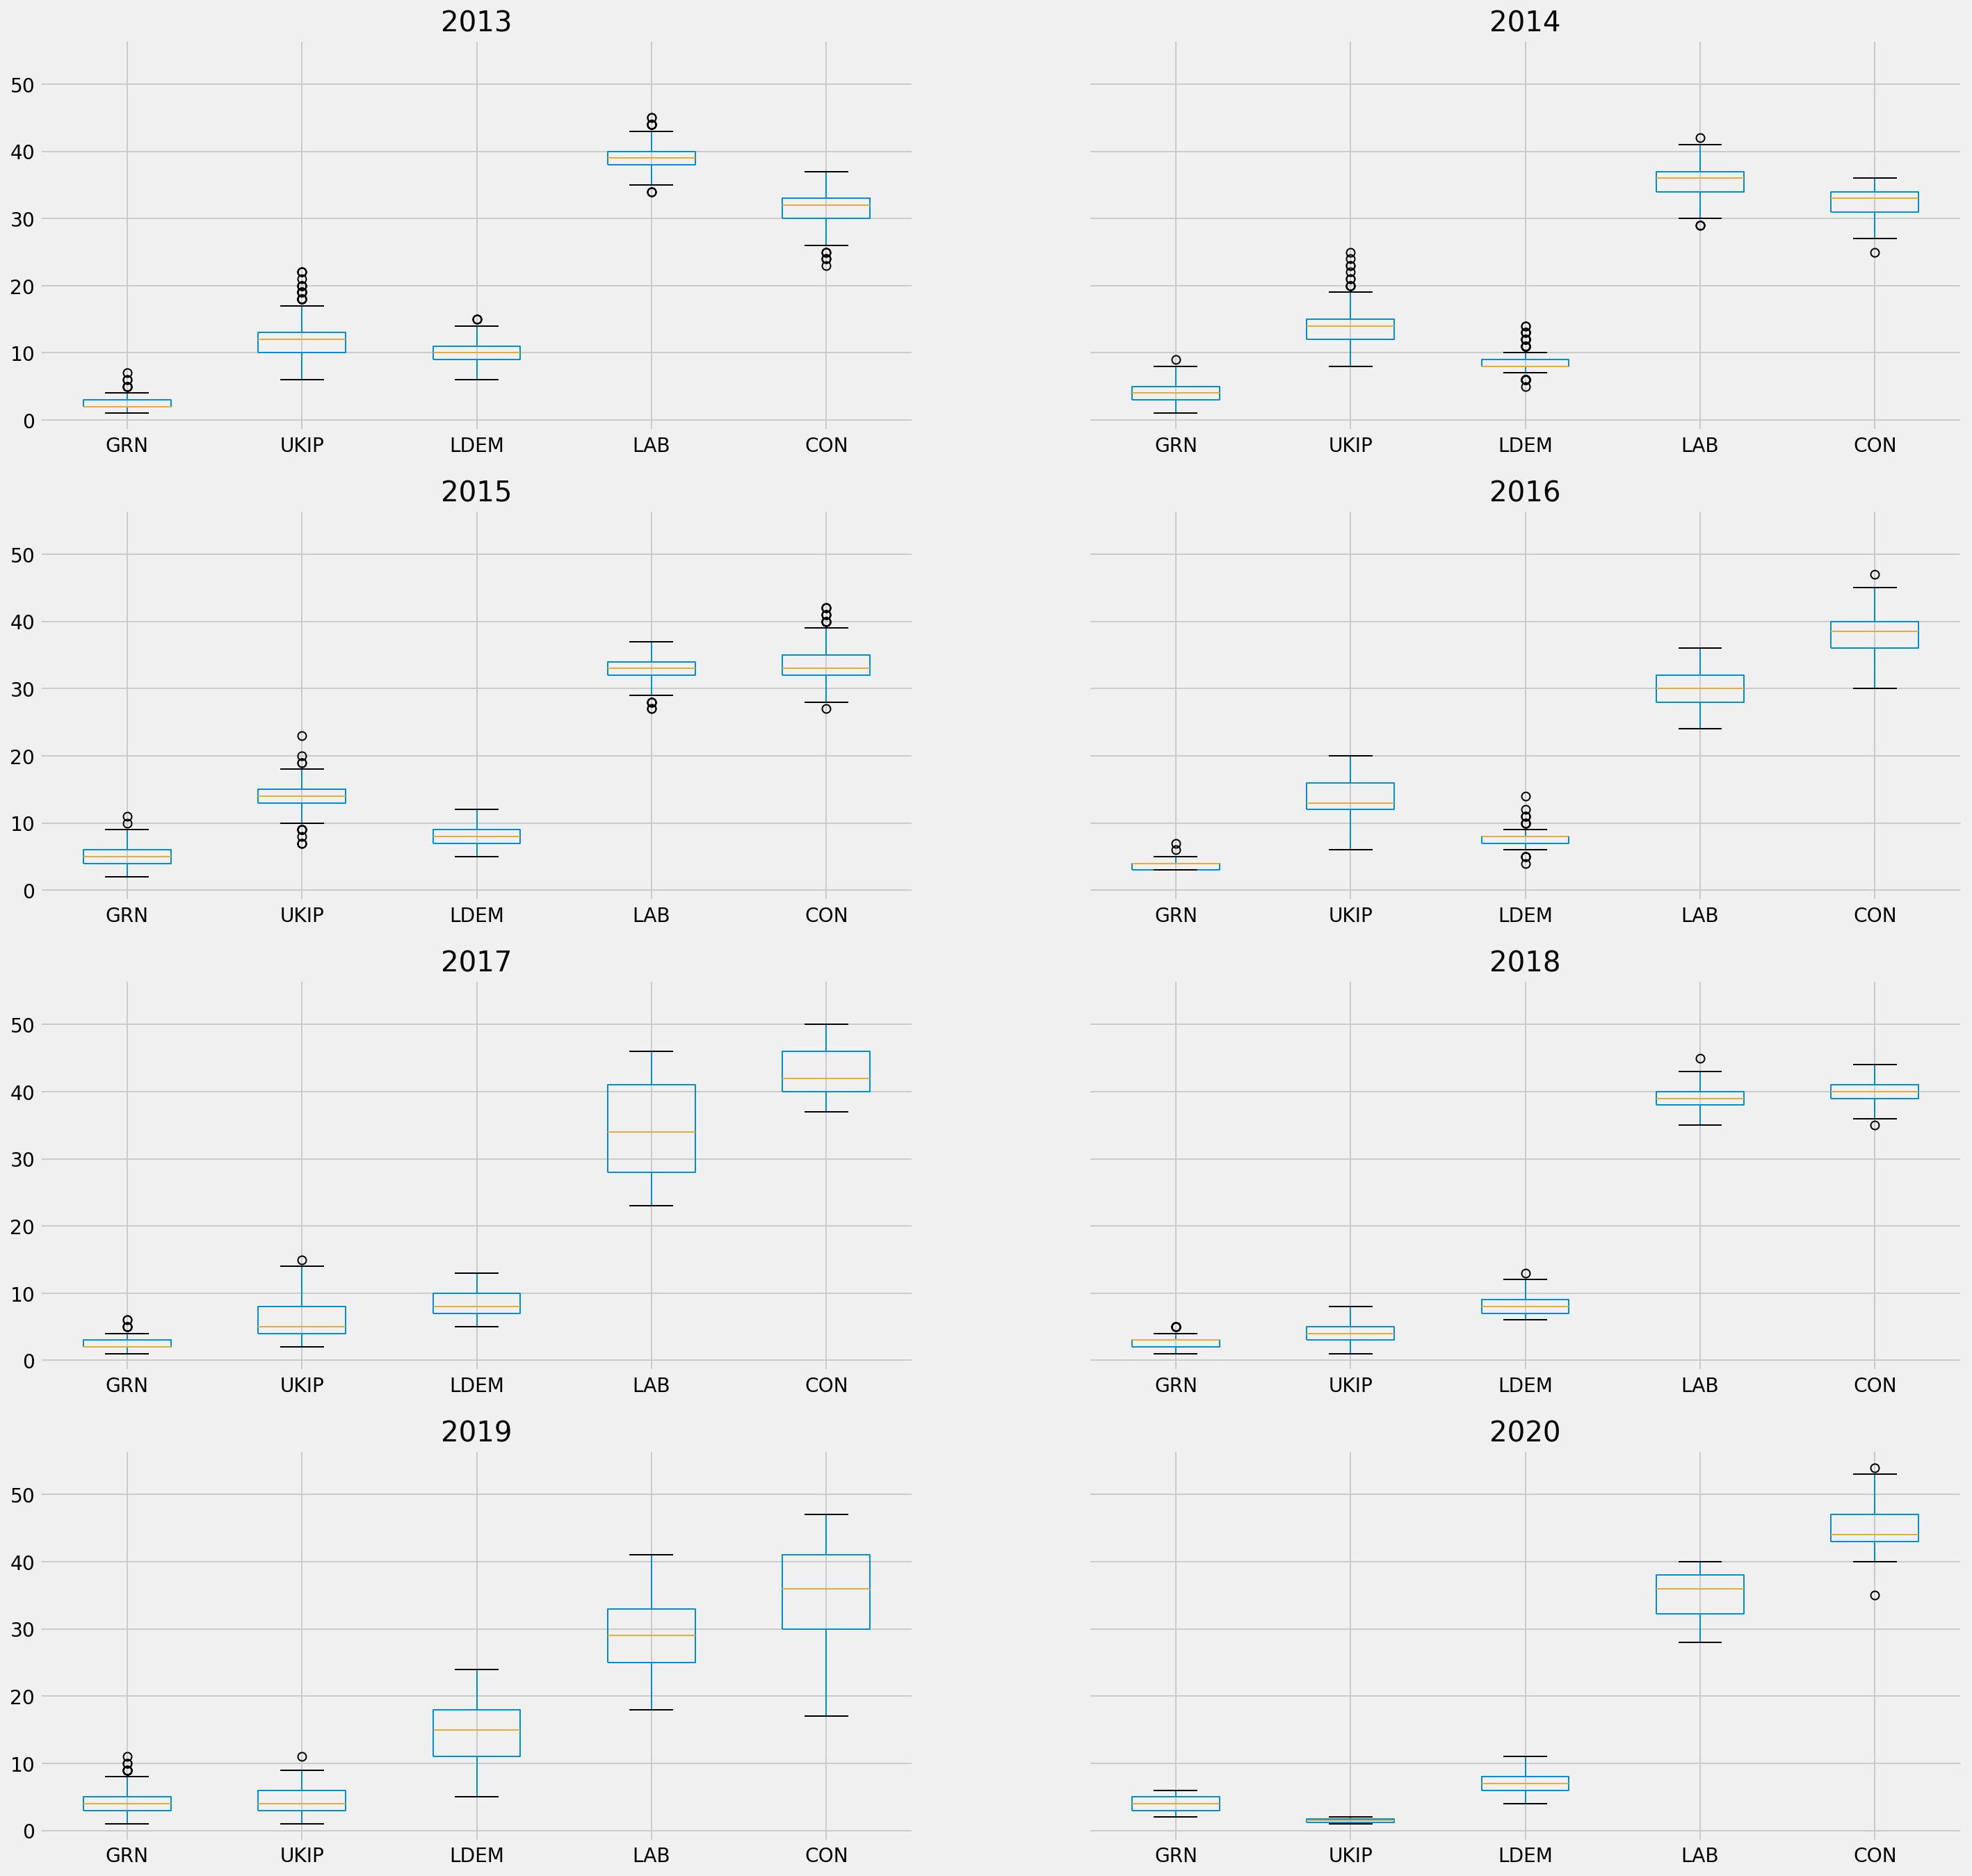

In [26]:
tmp = df[df.index.year >= 2013][["GRN", "UKIP", "LDEM", "LAB", "CON"]]
tmp.groupby(tmp.index.year).boxplot(figsize=(24, 24), layout=(4, 2));

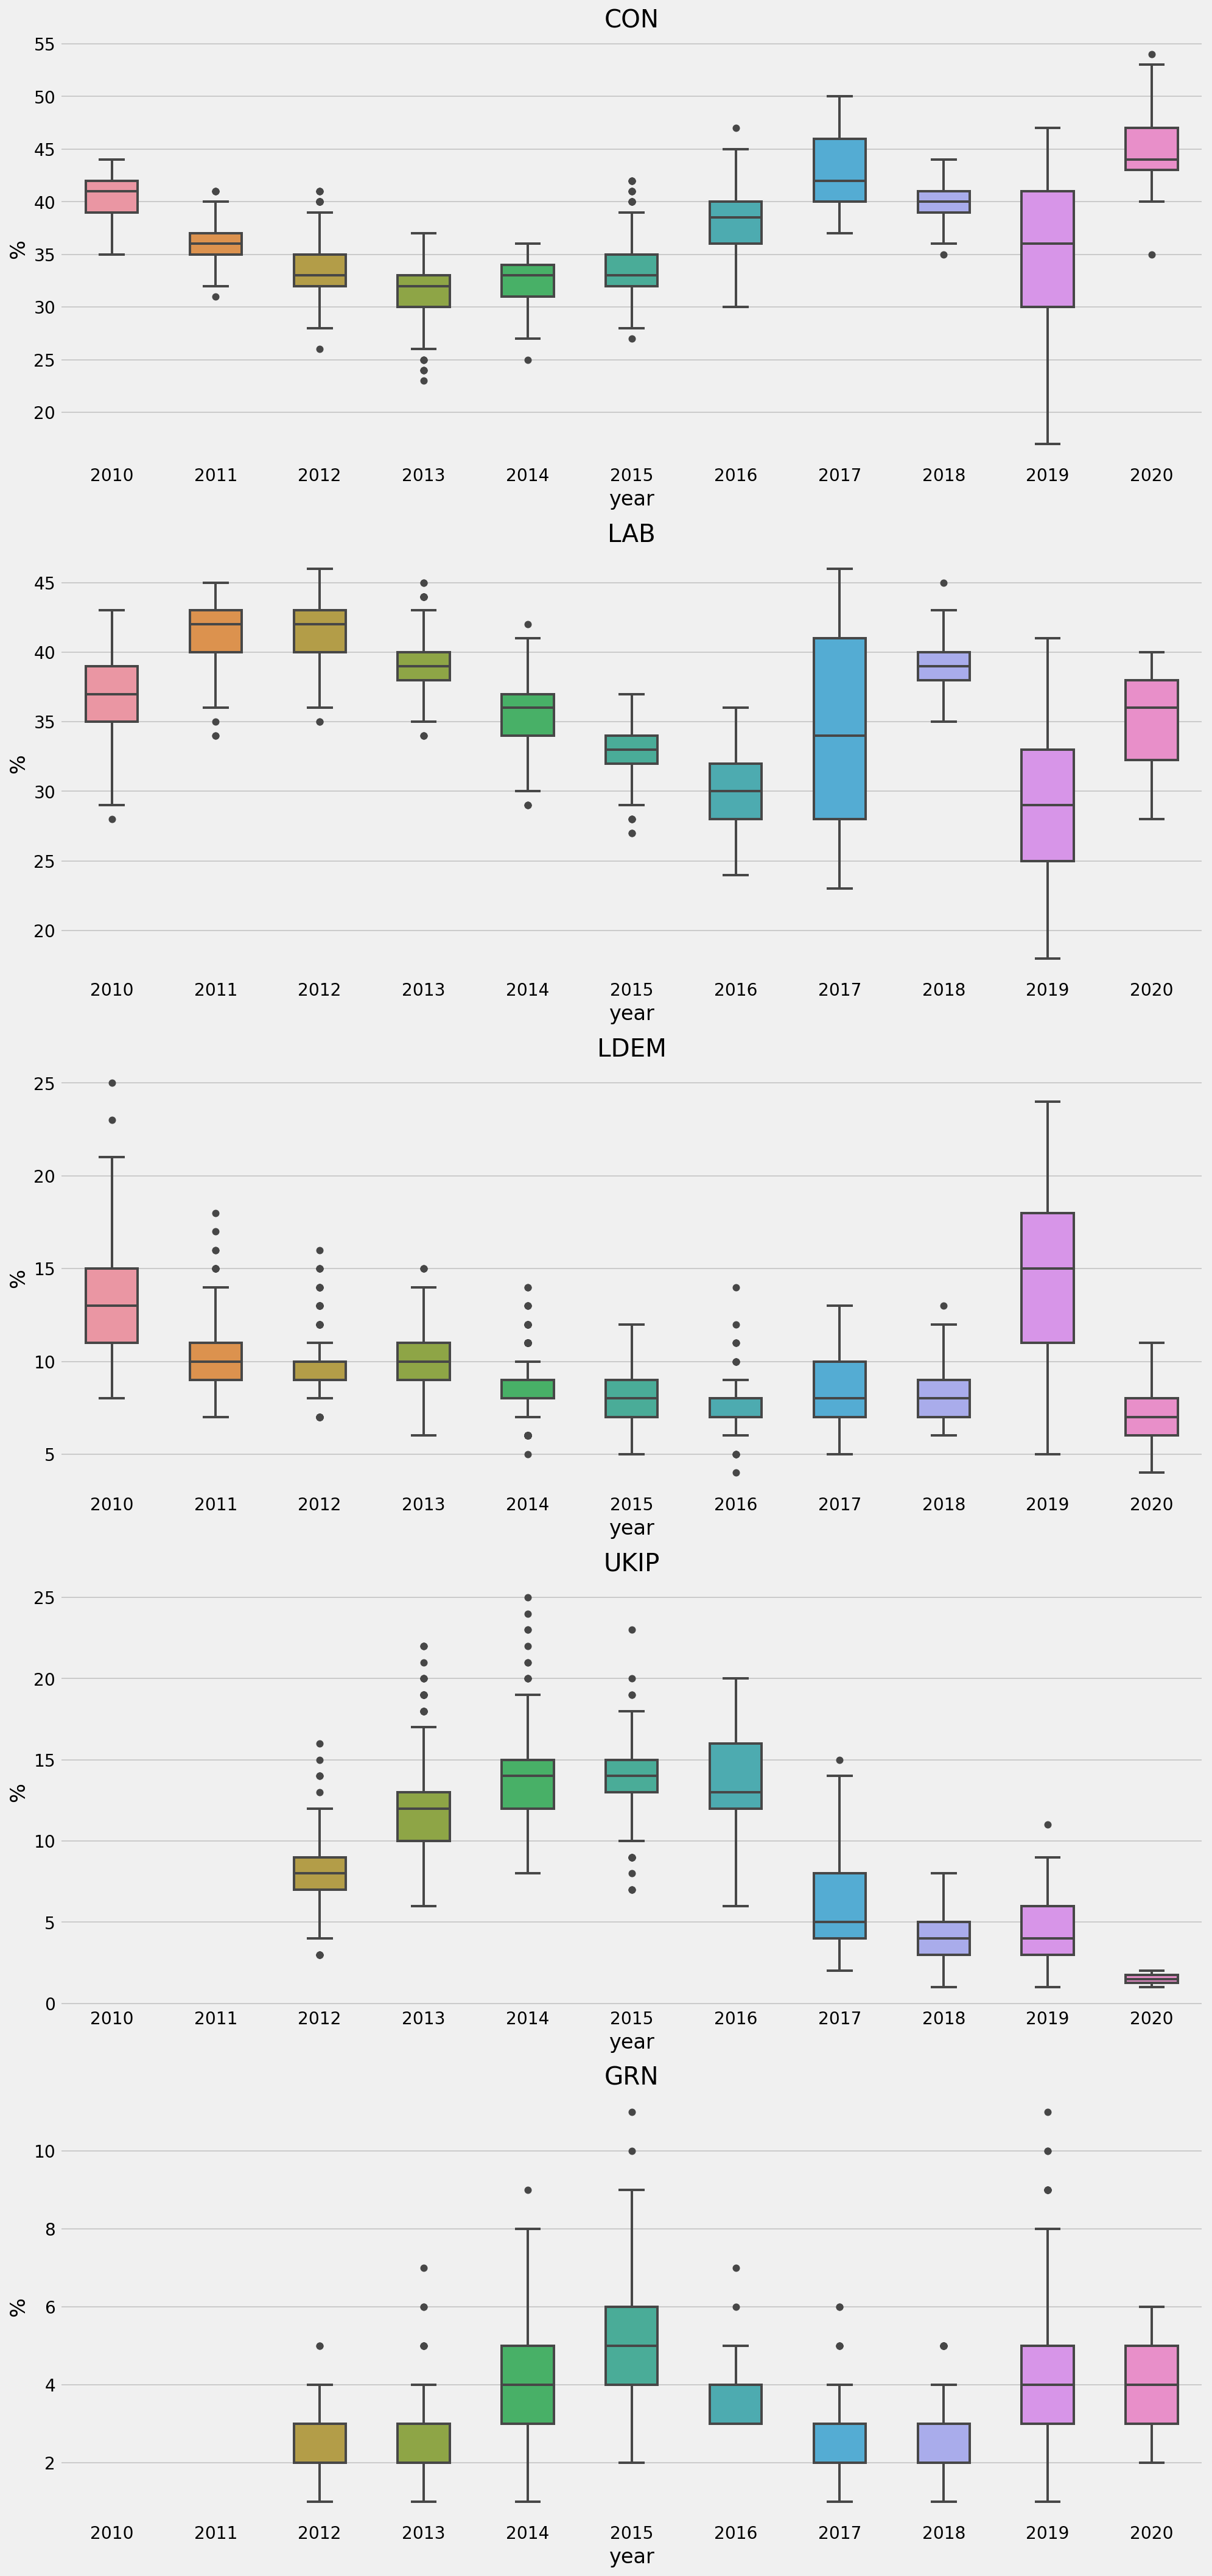

In [27]:
boxprops = {"linewidth": 2}
medianprops = {"linewidth": 2}
whiskerprops = {"linewidth": 2}
capprops = {"linewidth": 2}
flierprops = {"marker": "o"}
fig, axes = plt.subplots(5, 1, figsize=(15, 35))
for party, ax in zip(['CON', 'LAB', 'LDEM', 'UKIP', 'GRN'], axes):
    sns.boxplot(data=df.assign(year=df.index.year), x='year', y=party, width=0.5, ax=ax,
                boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(party)
    ax.set_ylabel("%")

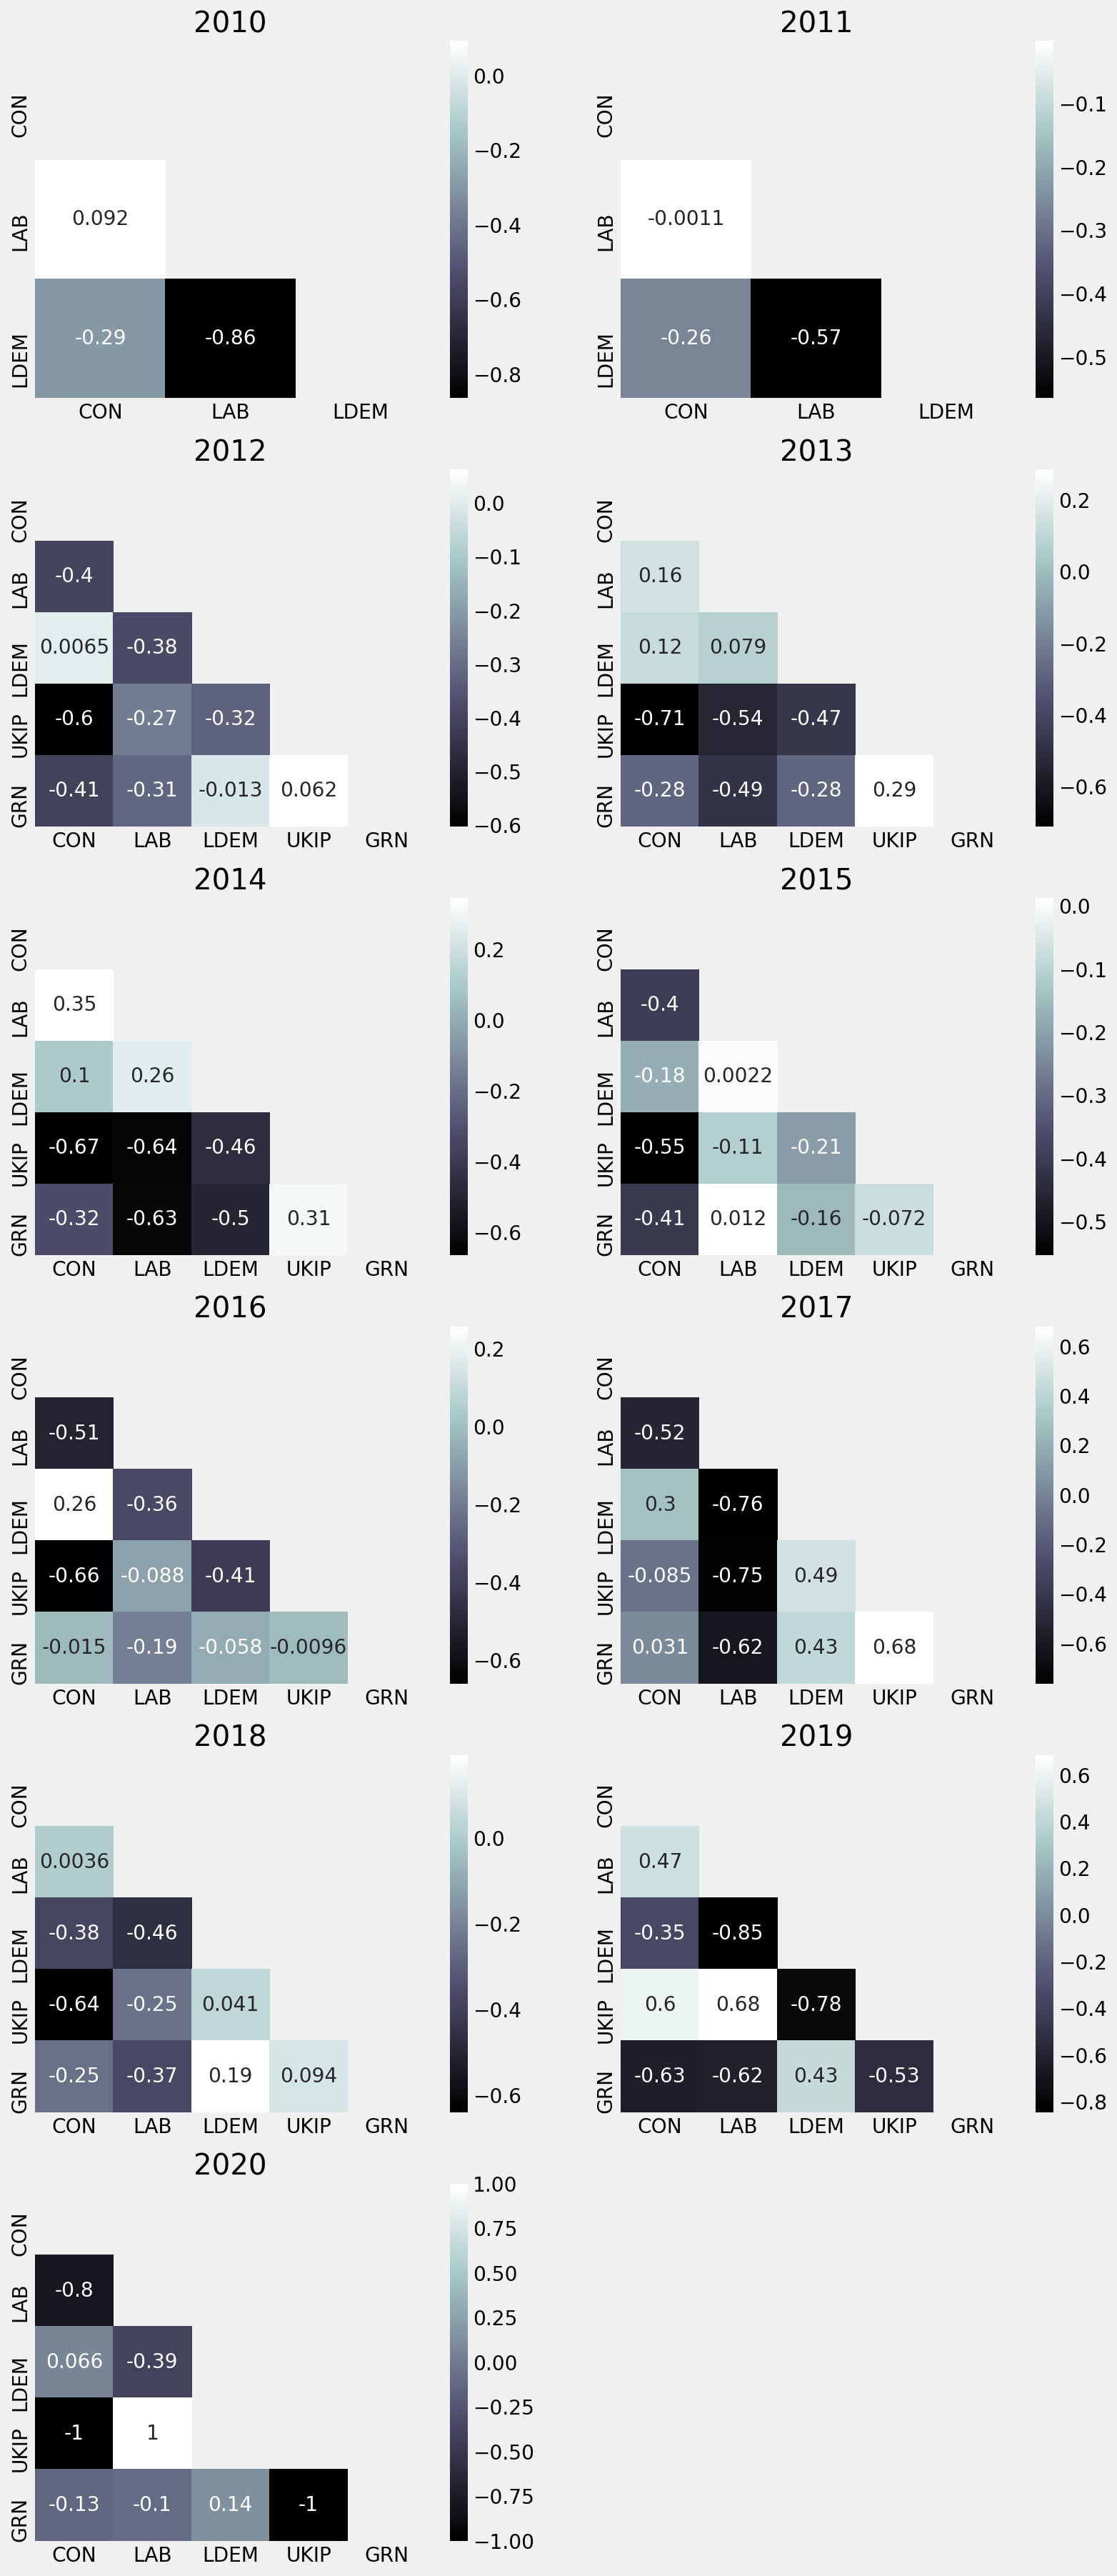

In [28]:
correlations = df.groupby(df.index.year)[['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr().transpose()
fig, axes = plt.subplots(6, 2, figsize=(12, 30))
for year, (i, j) in zip(df.index.year.unique(), product(range(6), range(2))):
    corr = (correlations[year]
            .dropna(how="all", axis="rows")
            .dropna(how="all", axis="columns"))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr,
                annot=True,
                ax=axes[i][j],
                mask=mask,
                cmap='bone')
    axes[i][j].set_title(year)
axes[5, 1].remove() 

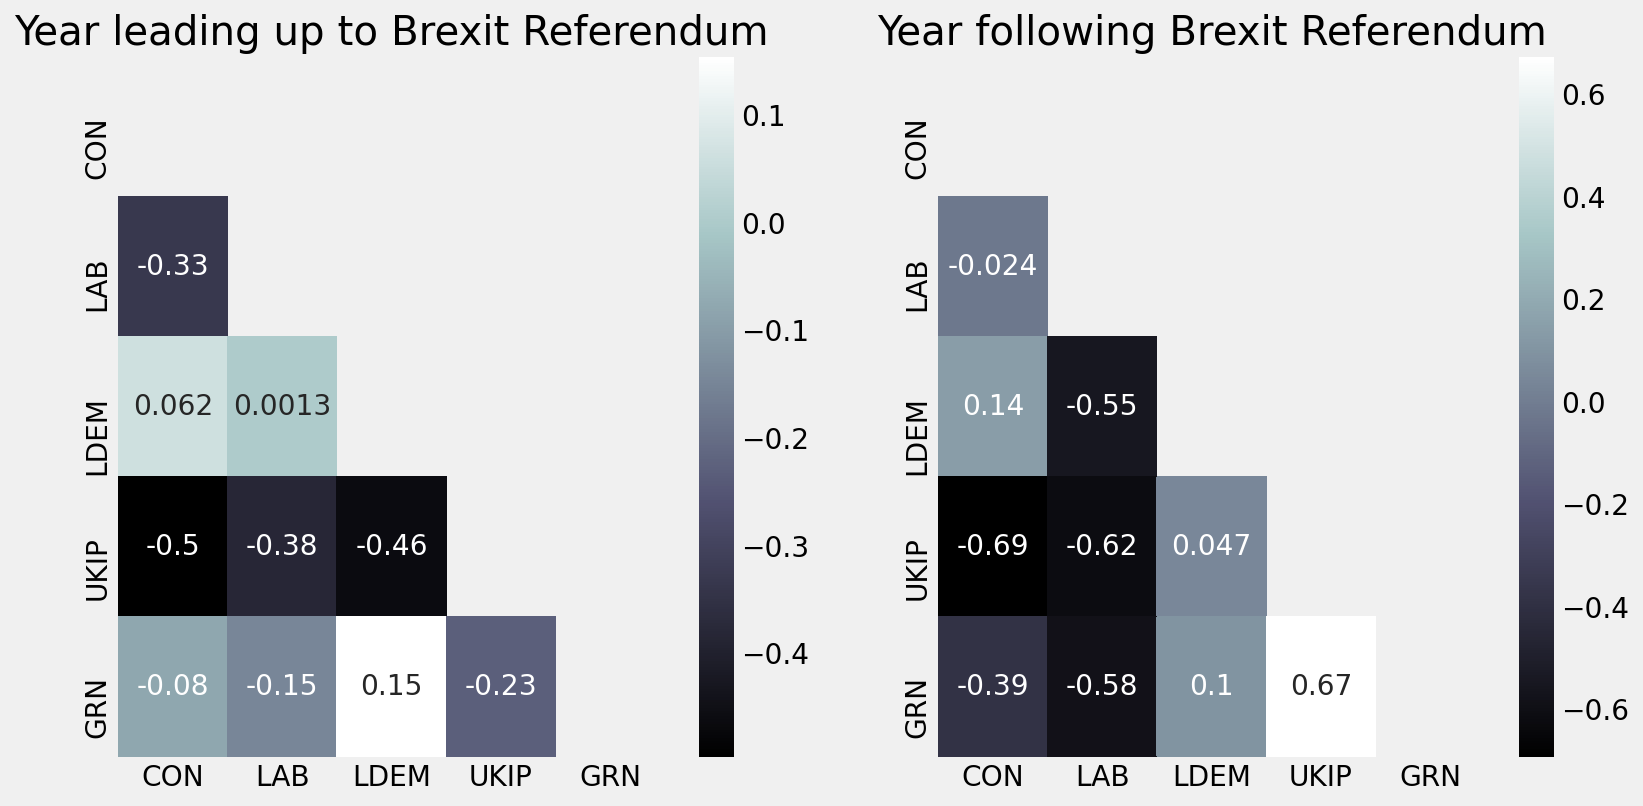

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2016"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax1,
            mask=mask,
            cmap='bone')
ax1.set_title("Year leading up to Brexit Referendum")
corr = df[(df.index >= pd.to_datetime("23 June 2016")) & (df.index <= pd.to_datetime("23 June 2017"))][['CON', 'LAB', 'LDEM', 'UKIP', 'GRN']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            ax=ax2,
            mask=mask,
            cmap='bone')
ax2.set_title("Year following Brexit Referendum");

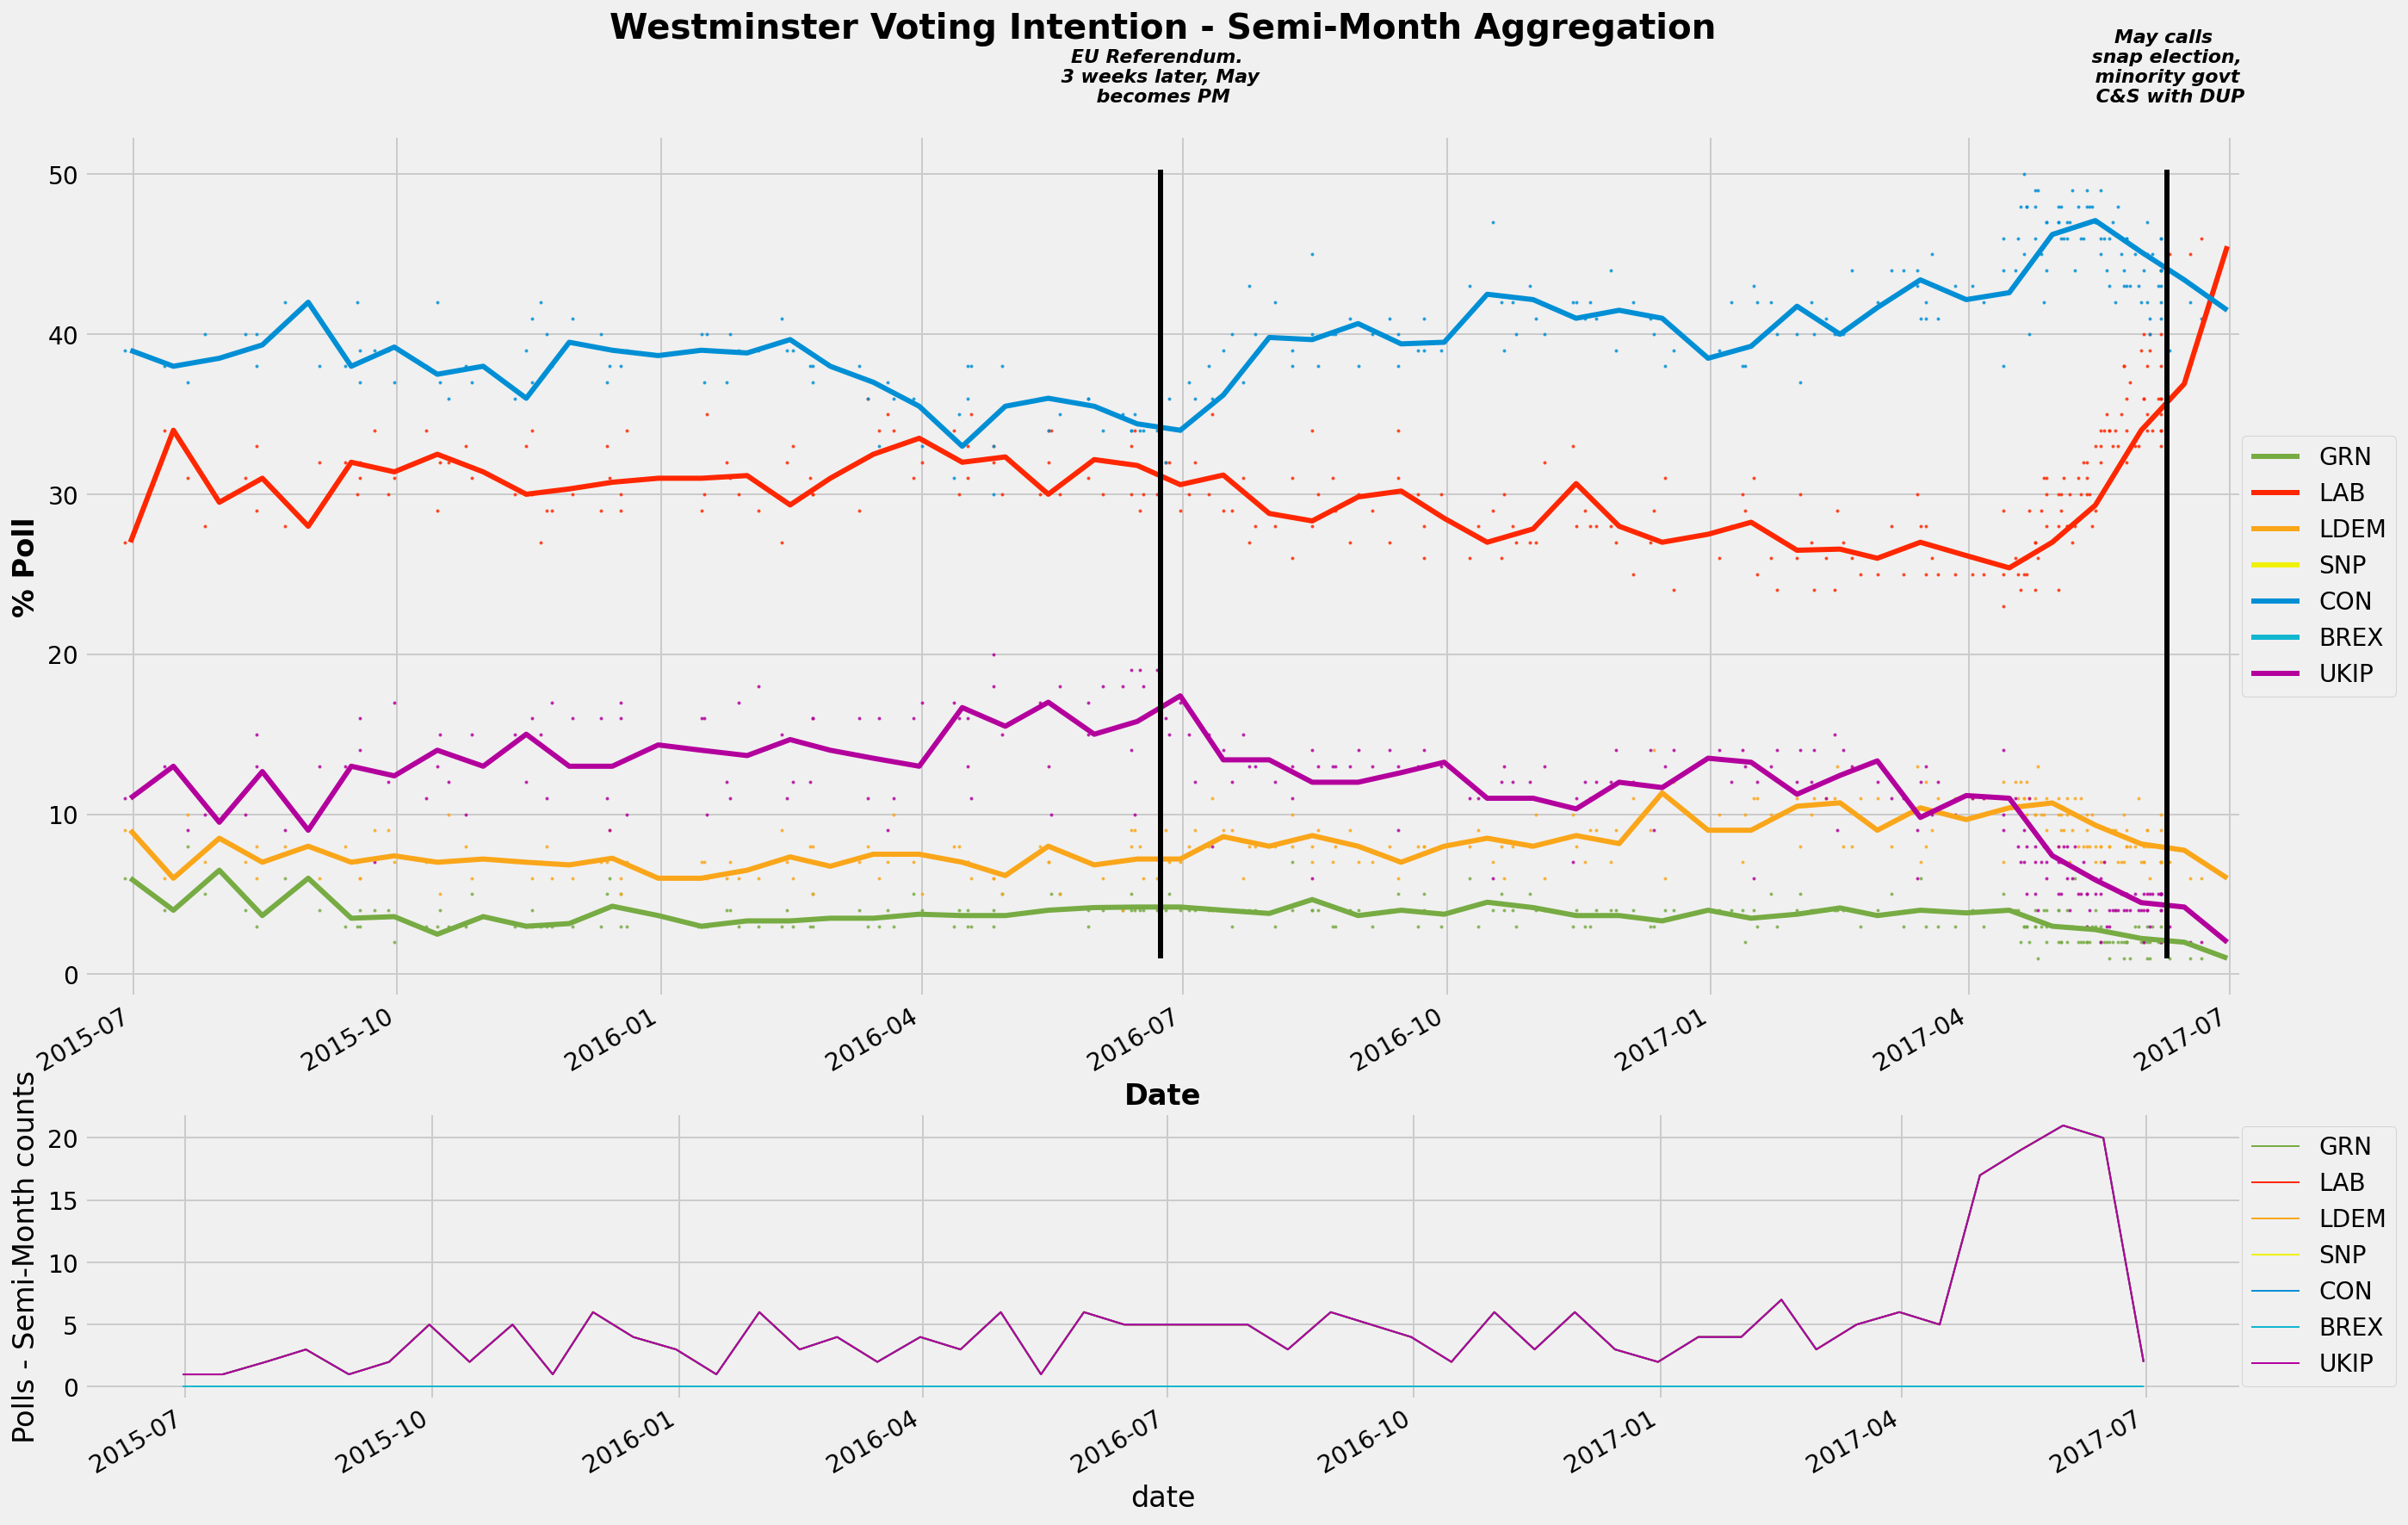

In [30]:
fig, ax = plot_vote_intention(df[(df.index >= pd.to_datetime("23 June 2015")) & (df.index <= pd.to_datetime("23 June 2017"))], agg="SM", add_lifetime_context=True)
ax.texts = [text_obj for text_obj in ax.texts
 if (text_obj._x >= pd.to_datetime("23 June 2015")) & (text_obj._x <= pd.to_datetime("23 June 2017"))]